In [41]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas_ta as ta

#print(os.getcwd())
#df = pd.read_csv('demo/tutorial.csv', delimiter=';')
df_1 = pd.read_csv('training/prices_round_2_day_-1.csv', delimiter=';')
df_2 = pd.read_csv('training/prices_round_2_day_0.csv', delimiter=';')
df_3 = pd.read_csv('training/prices_round_2_day_1.csv', delimiter=';')

# Append DF
df = df_1.append(df_2).append(df_3)
df.reset_index(drop=True, inplace=True)

#df['median_price'] = df.apply(lambda row: np.median([i for i in [row['bid_price_1'], row['bid_price_2'], row['bid_price_3'], row['ask_price_1'], row['ask_price_2'], row['ask_price_3']] if i > 0.0]), axis=1)


df

C:\Users\yinki\AppData\Local\Temp\ipykernel_16800\1642768368.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_1.append(df_2).append(df_3)


,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,-1
1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,-1
2,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,-1
3,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,-1
4,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,-1
...,...,...,...,...,...,...,...,...
29998,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,1
29999,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,1
30000,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,1
30001,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,1


7.55994400559944


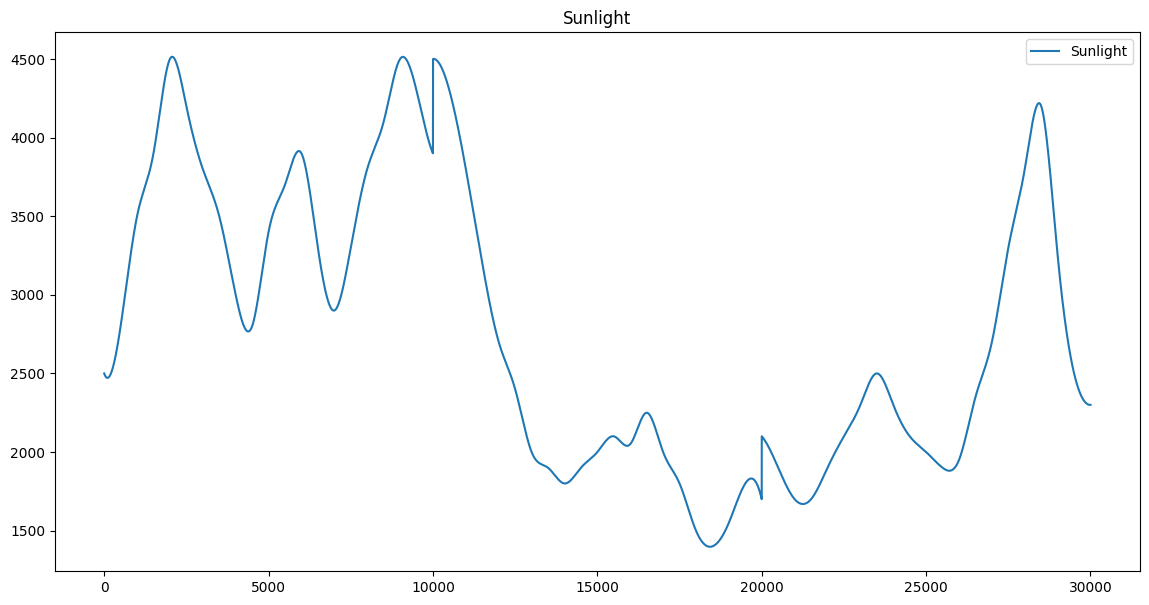

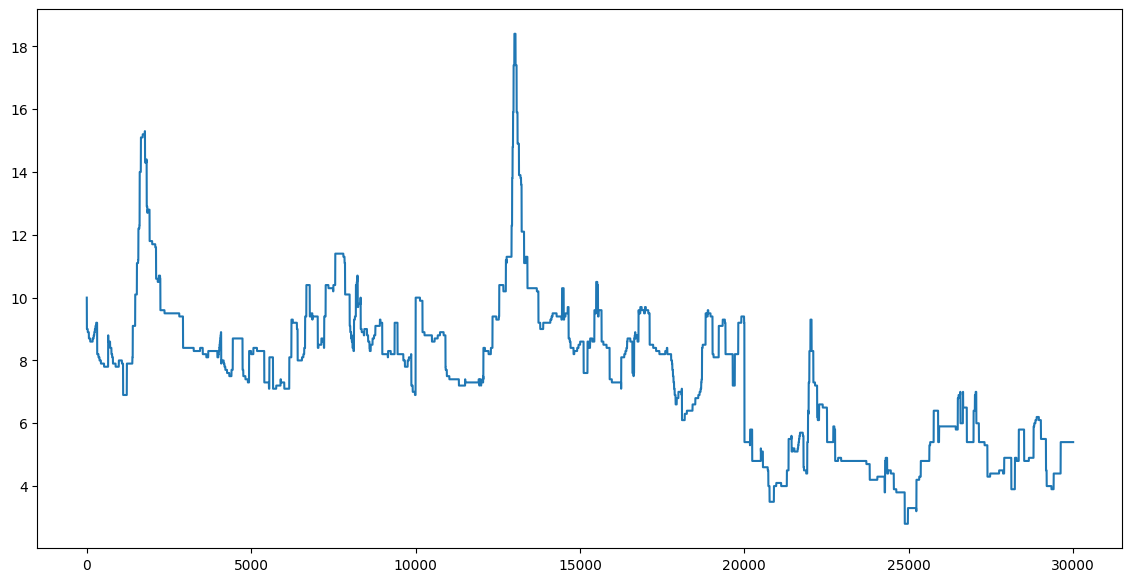

In [42]:

# Plot sunlight
plt.figure(figsize=(14, 7))
plt.plot(df['SUNLIGHT'], label='Sunlight')
plt.title('Sunlight')
plt.legend()



# Get the Interquartile Range for Sunlight
Q1 = df['SUNLIGHT'].quantile(0.25)
Q1


# Plot Tariffs
plt.figure(figsize=(14, 7))
plt.plot(df['TRANSPORT_FEES'] + df['EXPORT_TARIFF'] + df['IMPORT_TARIFF'], label='Tariff')


print((df['TRANSPORT_FEES'] + df['EXPORT_TARIFF'] + df['IMPORT_TARIFF']).mean())

In [66]:
df['Ideal Humidity'] = df['HUMIDITY'].apply(lambda x: 1 if x >= 60 and x <= 80 else 0)
df['Humidity Away From Ideal'] = df['HUMIDITY'].apply(lambda x: 60 - x if x < 60 else (80 - x if x > 80 else 0))
df['In Sun'] = df['SUNLIGHT'].apply(lambda x: 1 if x > 2500 else 0)

df.corr()

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,Ideal Humidity,Humidity Away From Ideal,In Sun
timestamp,1.000000e+00,-0.233472,-0.025516,-0.055170,-0.064258,-0.002905,-0.534867,-6.480675e-16,0.435395,0.513989,0.015219
ORCHIDS,-2.334717e-01,1.000000,0.300625,0.222046,0.364607,0.715692,0.710066,-7.371087e-01,-0.730594,-0.553979,0.689474
TRANSPORT_FEES,-2.551587e-02,0.300625,1.000000,0.273924,0.694204,0.172277,0.162856,-6.730436e-01,-0.335179,-0.289616,0.229244
EXPORT_TARIFF,-5.517001e-02,0.222046,0.273924,1.000000,0.281857,0.079873,0.111354,-2.741748e-01,-0.055527,-0.150468,-0.009418
IMPORT_TARIFF,-6.425823e-02,0.364607,0.694204,0.281857,1.000000,0.329229,0.121175,-8.142540e-01,-0.295960,-0.163706,0.350969
SUNLIGHT,-2.904790e-03,0.715692,0.172277,0.079873,0.329229,1.000000,0.622936,-5.315089e-01,-0.563640,-0.502939,0.873787
HUMIDITY,-5.348669e-01,0.710066,0.162856,0.111354,0.121175,0.622936,1.000000,-3.512669e-01,-0.870424,-0.889592,0.583986
DAY,-6.480675e-16,-0.737109,-0.673044,-0.274175,-0.814254,-0.531509,-0.351267,1.000000e+00,0.515473,0.294063,-0.573215
Ideal Humidity,4.353954e-01,-0.730594,-0.335179,-0.055527,-0.295960,-0.563640,-0.870424,5.154733e-01,1.000000,0.790805,-0.550937
Humidity Away From Ideal,5.139890e-01,-0.553979,-0.289616,-0.150468,-0.163706,-0.502939,-0.889592,2.940630e-01,0.790805,1.000000,-0.401090


In [67]:

for dfs in [df_1, df_2, df_3]:
    threshold_sunlight = 2500

    counter = 0
    counter_beneath_threshold = 0
    start_counter = 0

    def check_if_sunlight_is_beneath_threshold(sunlight):
        global counter
        global counter_beneath_threshold
        global start_counter
        counter += 1
        
        if sunlight < threshold_sunlight:
            counter_beneath_threshold += 1
        
        if counter_beneath_threshold > int((17/24) * 10000):
            start_counter += 1
            return start_counter / 70
        
        return 0


    dfs['TOTAL_TARIFF'] = dfs['IMPORT_TARIFF'] + dfs['EXPORT_TARIFF'] + dfs['TRANSPORT_FEES']
    dfs['Ideal Humidity'] = dfs['HUMIDITY'].apply(lambda x: 1 if x <= 80 and x >= 60 else 0)
    dfs['Humidity Away from Ideal'] = dfs['HUMIDITY'].apply(lambda x: (60 - x) // 5  if x < 60 else (x - 80) // 5 if x > 80 else 0)
    dfs['ORCHID_CHANGE'] = dfs['ORCHIDS'].shift(-1) - dfs['ORCHIDS']
    dfs['LOG_ORCHID_CHANGE'] = np.log(dfs['ORCHID_CHANGE'] + 1)
    dfs['TARIFF_CHANGE'] = dfs['TOTAL_TARIFF'].shift(-1) - dfs['TOTAL_TARIFF']
    dfs['SUNLIGHT_HUMIDITY'] = dfs['SUNLIGHT'] * dfs['HUMIDITY']
    dfs['SUNLIGHT_HUMIDITY_IDEAL'] = dfs['SUNLIGHT'] * dfs['HUMIDITY'] * dfs['Ideal Humidity']
    dfs['EXPOSED SUNLIGHT'] = dfs['SUNLIGHT'].apply(check_if_sunlight_is_beneath_threshold)
    dfs['SUNLIGHT_HUMIDITY_RATIO'] = dfs['SUNLIGHT'] / dfs['HUMIDITY'] 

    # Making Lags 1, 2, 3
    dfs['ORCHID_LAG'] = dfs['ORCHIDS'].shift(1)
    dfs['TOTAL_TARIFF_LAG'] = dfs['TOTAL_TARIFF'].shift(1)
    dfs['Ideal Humidity Lag'] = dfs['Ideal Humidity'].shift(1)
    dfs['Humidity Away from Ideal Lag'] = dfs['Humidity Away from Ideal'].shift(1) 
    dfs['SUNLIGHT_LAG'] = dfs['SUNLIGHT'].shift(1)
    dfs['EXPOSED SUNLIGHT LAG'] = dfs['EXPOSED SUNLIGHT'].shift(1)
    dfs['ORCHID_CHANGE_LAG'] = dfs['ORCHID_CHANGE'].shift(1)
    dfs['TARIFF_CHANGE_LAG'] = dfs['TARIFF_CHANGE'].shift(1)
    dfs['SUNLIGHT_HUMIDITY_LAG'] = dfs['SUNLIGHT_HUMIDITY'].shift(1)
    dfs['SUNLIGHT_HUMIDITY_IDEAL_LAG'] = dfs['SUNLIGHT_HUMIDITY_IDEAL'].shift(1)
    dfs['SUNLIGHT_HUMIDITY_RATIO_LAG'] = dfs['SUNLIGHT_HUMIDITY_RATIO'].shift(1)
    dfs['LOG_ORCHID_CHANGE_LAG'] = dfs['LOG_ORCHID_CHANGE'].shift(1)
    
    dfs['ORCHID_LAG_2'] = dfs['ORCHIDS'].shift(2)
    dfs['TOTAL_TARIFF_LAG_2'] = dfs['TOTAL_TARIFF'].shift(2)
    dfs['Ideal Humidity Lag_2'] = dfs['Ideal Humidity'].shift(2)
    dfs['Humidity Away from Ideal Lag_2'] = dfs['Humidity Away from Ideal'].shift(2) 
    dfs['SUNLIGHT_LAG_2'] = dfs['SUNLIGHT'].shift(2)
    dfs['EXPOSED SUNLIGHT LAG_2'] = dfs['EXPOSED SUNLIGHT'].shift(2)
    dfs['ORCHID_CHANGE_LAG_2'] = dfs['ORCHID_CHANGE'].shift(2)
    dfs['TARIFF_CHANGE_LAG_2'] = dfs['TARIFF_CHANGE'].shift(2)
    dfs['SUNLIGHT_HUMIDITY_LAG'] = dfs['SUNLIGHT_HUMIDITY'].shift(2)
    dfs['SUNLIGHT_HUMIDITY_IDEAL_LAG'] = dfs['SUNLIGHT_HUMIDITY_IDEAL'].shift(2)
    dfs['SUNLIGHT_HUMIDITY_RATIO_LAG'] = dfs['SUNLIGHT_HUMIDITY_RATIO'].shift(2)
    dfs['LOG_ORCHID_CHANGE_LAG'] = dfs['LOG_ORCHID_CHANGE'].shift(2)
    
    
    
    dfs['ORCHID_LAG_3'] = dfs['ORCHIDS'].shift(3)
    dfs['TOTAL_TARIFF_LAG_3'] = dfs['TOTAL_TARIFF'].shift(3)
    dfs['Ideal Humidity Lag_3'] = dfs['Ideal Humidity'].shift(3)
    dfs['Humidity Away from Ideal Lag_3'] = dfs['Humidity Away from Ideal'].shift(3) 
    dfs['SUNLIGHT_LAG_3'] = dfs['SUNLIGHT'].shift(3)
    dfs['EXPOSED SUNLIGHT LAG_3'] = dfs['EXPOSED SUNLIGHT'].shift(3)
    dfs['ORCHID_CHANGE_LAG_3'] = dfs['ORCHID_CHANGE'].shift(3)
    dfs['TARIFF_CHANGE_LAG_3'] = dfs['TARIFF_CHANGE'].shift(3)
    dfs['SUNLIGHT_HUMIDITY_LAG'] = dfs['SUNLIGHT_HUMIDITY'].shift(3)
    dfs['SUNLIGHT_HUMIDITY_IDEAL_LAG'] = dfs['SUNLIGHT_HUMIDITY_IDEAL'].shift(3)
    dfs['SUNLIGHT_HUMIDITY_RATIO_LAG'] = dfs['SUNLIGHT_HUMIDITY_RATIO'].shift(3)
    dfs['LOG_ORCHID_CHANGE_LAG'] = dfs['LOG_ORCHID_CHANGE'].shift(3)




    
    dfs.dropna(inplace=True)
    dfs.replace(-np.inf, -2, inplace=True)
    dfs
    dfs.corr()
    


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [68]:
df_1.corr()

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,TOTAL_TARIFF,Ideal Humidity,...,ORCHID_CHANGE_LAG_2,TARIFF_CHANGE_LAG_2,ORCHID_LAG_3,TOTAL_TARIFF_LAG_3,Ideal Humidity Lag_3,Humidity Away from Ideal Lag_3,SUNLIGHT_LAG_3,EXPOSED SUNLIGHT LAG_3,ORCHID_CHANGE_LAG_3,TARIFF_CHANGE_LAG_3
timestamp,1.000000,-0.055403,-0.105418,0.036453,-0.483489,0.321421,-0.373169,NaN,-0.074645,0.133664,...,-0.000766,-0.004497,-0.055136,-0.073276,0.132282,-0.393354,0.322027,NaN,-0.007890,-0.008252
ORCHIDS,-0.055403,1.000000,0.108994,0.176506,-0.124443,0.626835,0.656096,NaN,0.161008,-0.555372,...,0.022778,-0.006594,0.996978,0.162592,-0.555417,0.487999,0.627712,NaN,0.024112,-0.011025
TRANSPORT_FEES,-0.105418,0.108994,1.000000,0.152512,-0.098120,-0.081254,0.065727,NaN,0.263511,-0.052520,...,0.001188,-0.017892,0.108919,0.266846,-0.051113,0.008441,-0.082626,NaN,0.014436,-0.015319
EXPORT_TARIFF,0.036453,0.176506,0.152512,1.000000,-0.077079,0.340729,0.244335,NaN,0.973562,0.075839,...,0.007589,0.034862,0.175049,0.968721,0.075947,0.346659,0.339083,NaN,0.023019,0.043393
IMPORT_TARIFF,-0.483489,-0.124443,-0.098120,-0.077079,1.000000,-0.401230,-0.089109,NaN,0.109992,0.151227,...,0.000400,-0.007252,-0.124441,0.110038,0.152084,-0.007372,-0.400011,NaN,-0.001038,0.003883
SUNLIGHT,0.321421,0.626835,-0.081254,0.340729,-0.401230,1.000000,0.680144,NaN,0.239498,-0.437219,...,0.004342,-0.010922,0.626012,0.241656,-0.439295,0.608531,0.999983,NaN,0.011562,-0.007857
HUMIDITY,-0.373169,0.656096,0.065727,0.244335,-0.089109,0.680144,1.000000,NaN,0.227819,-0.670864,...,0.002992,-0.004143,0.655359,0.228074,-0.671047,0.884543,0.679274,NaN,0.016302,0.001178
DAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TOTAL_TARIFF,-0.074645,0.161008,0.263511,0.973562,0.109992,0.239498,0.227819,NaN,1.000000,0.096249,...,0.007587,0.029897,0.159588,0.995773,0.096713,0.335313,0.237960,NaN,0.024034,0.040709
Ideal Humidity,0.133664,-0.555372,-0.052520,0.075839,0.151227,-0.437219,-0.670864,NaN,0.096249,1.000000,...,0.001268,0.000120,-0.555285,0.095297,0.995451,-0.381488,-0.436103,NaN,-0.001751,0.013237


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1362.144228442704, tolerance: 0.2986235131726457
  model = cd_fast.enet_coordinate_descent_gram(
.C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1335.0474347543184, tolerance: 0.29371558295964134
  model = cd_fast.enet_coordinate_descent_gram(
.C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python

Best Alpha: 0.0989909090909091
Selected 6 features from 38
Selected Features: Index(['SUNLIGHT_HUMIDITY', 'SUNLIGHT_HUMIDITY_IDEAL', 'SUNLIGHT_HUMIDITY_LAG',
       'SUNLIGHT_HUMIDITY_IDEAL_LAG', 'ORCHID_LAG_2', 'SUNLIGHT_LAG_3'],
      dtype='object')
Mean Squared Error: 0.6775122706133403
R-Squared: -0.005149769149838779
Coefficients: [-0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  4.25525671e-06  2.60996404e-07
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -2.43701036e-06 -3.28581158e-07
 -0.00000000e+00 -0.00000000e+00 -1.16256464e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.78761626e-04  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00]
Intercept: 1.678280202737575
(5575, 38) (5

C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.692e+03, tolerance: 3.666e-01
  model = cd_fast.enet_coordinate_descent(


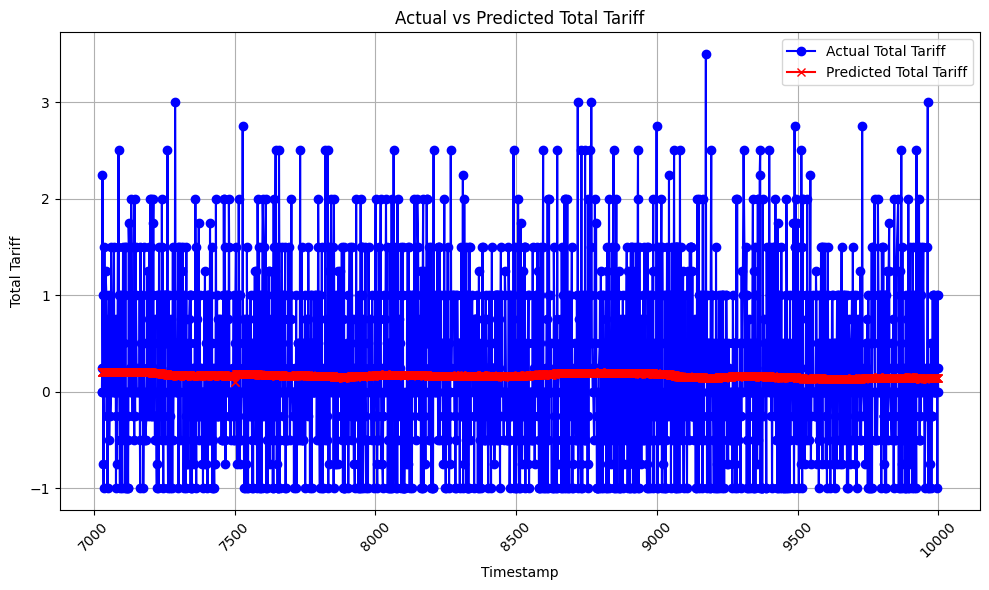

Train Mean Squared Error: 0.656801240752079


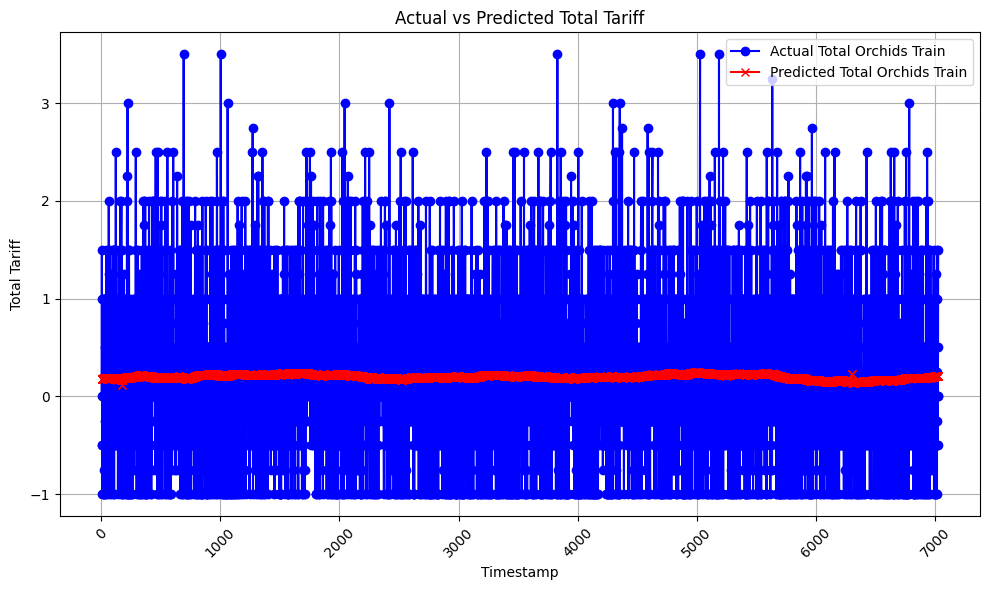

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1133.3401066293495, tolerance: 0.29675998530741443
  model = cd_fast.enet_coordinate_descent_gram(
.C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 502.41616954218534, tolerance: 0.293290832674051
  model = cd_fast.enet_coordinate_descent_gram(
.C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python

Best Alpha: 0.1
Selected 9 features from 38
Selected Features: Index(['SUNLIGHT', 'SUNLIGHT_HUMIDITY', 'SUNLIGHT_HUMIDITY_IDEAL',
       'ORCHID_LAG', 'SUNLIGHT_LAG', 'SUNLIGHT_HUMIDITY_LAG',
       'SUNLIGHT_HUMIDITY_IDEAL_LAG', 'SUNLIGHT_LAG_2', 'SUNLIGHT_LAG_3'],
      dtype='object')
Mean Squared Error: 0.6587103724346208
R-Squared: -0.006558537609352433
Coefficients: [-9.13885077e-05  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  1.04905370e-06  6.13517577e-07
  0.00000000e+00 -0.00000000e+00 -7.31600075e-04  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -6.58923711e-05  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  1.91644539e-06 -2.37741535e-07
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -8.17360866e-05  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -4.73113055e-05  0.00000000e+00
  0.00000000e+00 -0.00000000e+00]
Interc

C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.107e+03, tolerance: 3.695e-01
  model = cd_fast.enet_coordinate_descent(


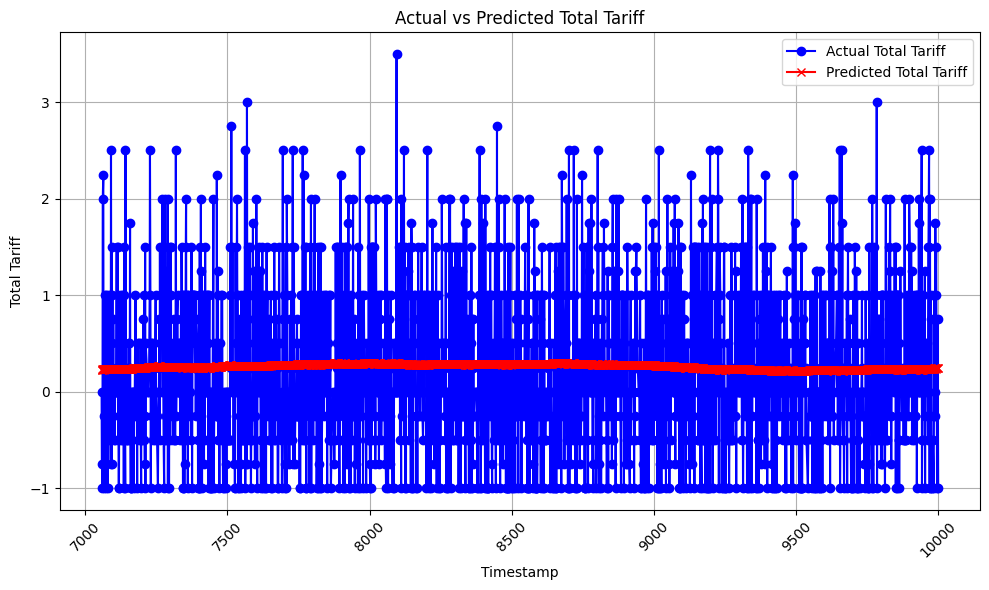

Train Mean Squared Error: 0.6674409160742628


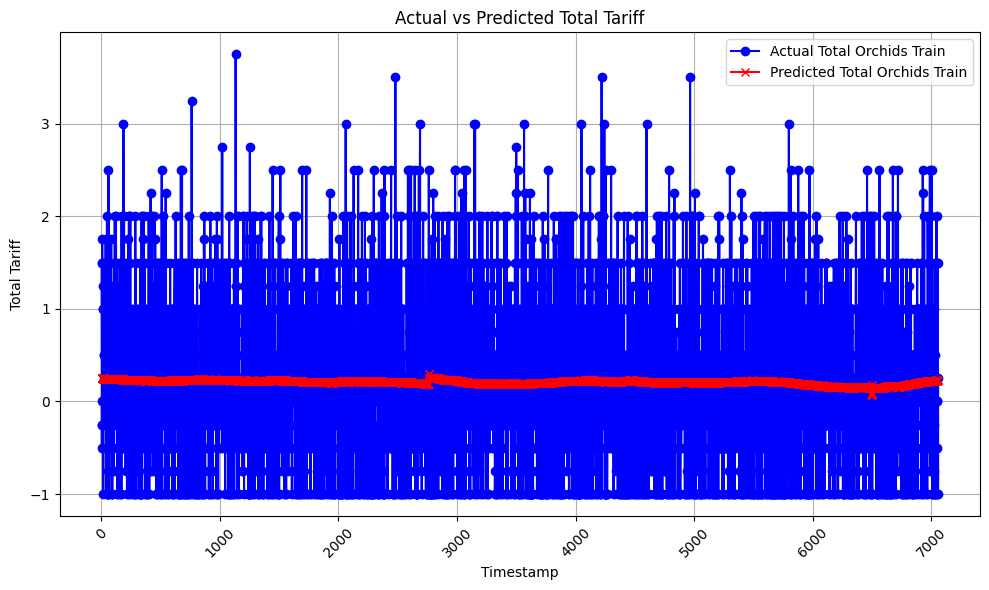

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 392.30051781196994, tolerance: 0.2753138135996197
  model = cd_fast.enet_coordinate_descent_gram(
.C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128.39778360275022, tolerance: 0.2763510282929148
  model = cd_fast.enet_coordinate_descent_gram(
.....C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Py

Best Alpha: 0.1
Selected 6 features from 38
Selected Features: Index(['SUNLIGHT', 'SUNLIGHT_HUMIDITY', 'SUNLIGHT_HUMIDITY_IDEAL',
       'SUNLIGHT_HUMIDITY_LAG', 'SUNLIGHT_HUMIDITY_IDEAL_LAG', 'ORCHID_LAG_3'],
      dtype='object')
Mean Squared Error: 1.119184154797627
R-Squared: -0.12736738945099169
Coefficients: [-5.74762828e-04  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  1.05834501e-06 -2.40420589e-06
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  4.09699562e-06  3.16013591e-06
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -1.62169230e-03 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00]
Intercept: 2.2110233281241114
(5258, 38) (5258,) (2254, 38) (2254

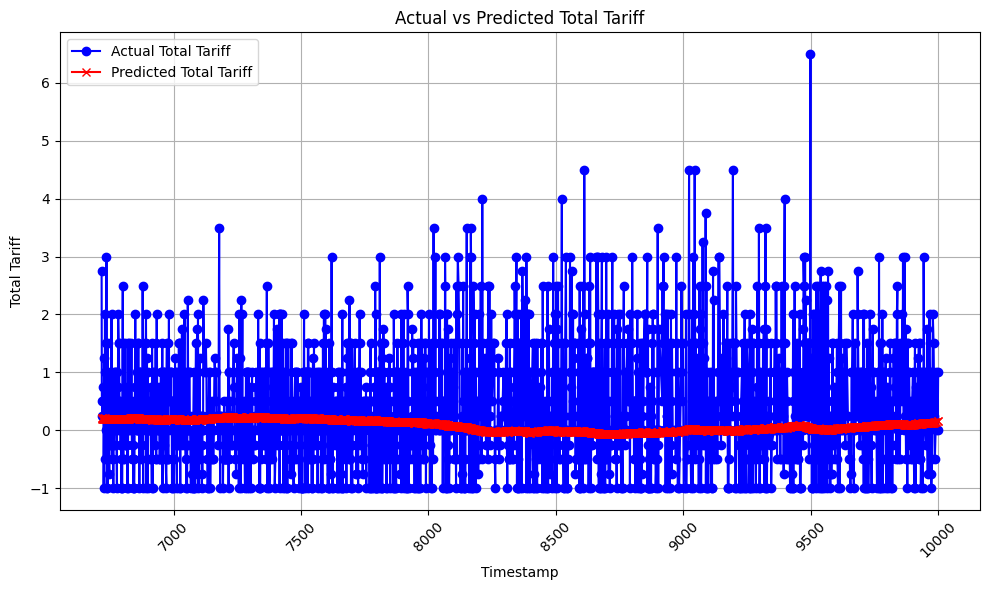

Train Mean Squared Error: 0.6558953737330244


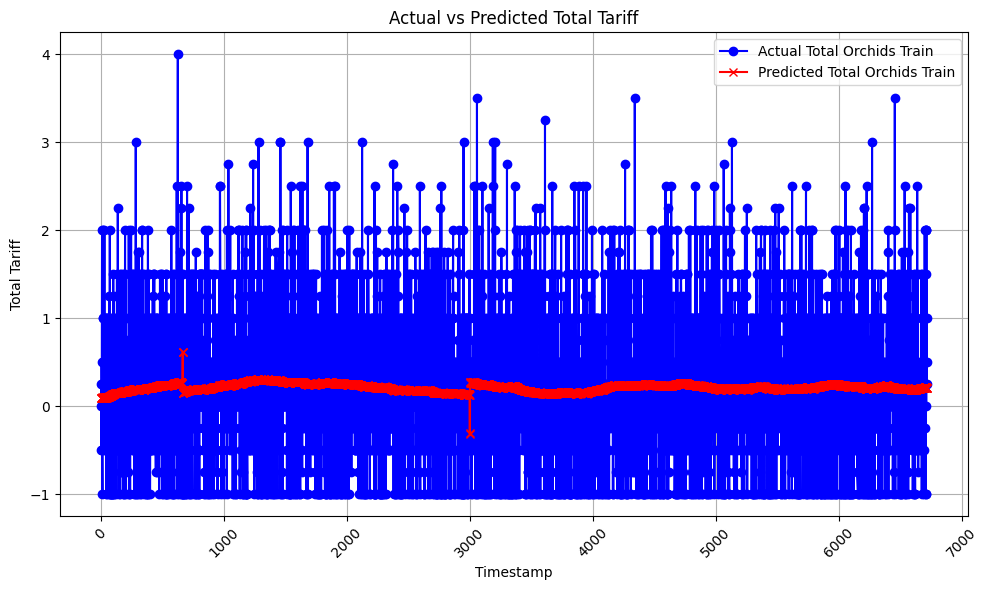

(array([-2.22050445e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  2.12088514e-06, -5.09897304e-07,
         0.00000000e+00,  0.00000000e+00, -2.43866692e-04,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -2.19641237e-05,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.19214355e-06,  8.64604405e-07,
         0.00000000e+00,  0.00000000e+00, -3.87521546e-04,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -2.72453622e-05,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -5.40564099e-04,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -7.53576440e-05,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]),
 1.6573268825549945)

In [59]:
# MultiVariate Linear Regression
from statsmodels.regression.linear_model import OLS
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.linear_model import LassoCV


CURR_MIN = 10000000
Y_PRED = None
CURR_N = 0
Y_TEST = None
best_coef = None
model_intercept = None
Y_TRAIN = None
Y_TRAIN_PRED = None
best_mape = 10000000
best_bic = 10000000
# Using Grid Search to find the best parameters for Xt = bXt-1 + cXt-2 + ... + dXt-n + e, where n is the number of lags, and Xt is itself
directional_accuracy = {}

train_df1, train_df2, train_df3 = df_1.copy(), df_2.copy(), df_3.copy()

results = {
    'mse': [],
    'mape': [],
    'rsquared': [],
    'bic': [],
    'coefficients': [],
    'intercept': [],
    'Y_PRED': [],
    'Y_TEST': [],
    'Y_TRAIN': [],
    'Y_TRAIN_PRED': [],
    'Type': []
    
}

coefficients_res = []
intercepts_res = []
for dfs in [train_df1, train_df2, train_df3]:
    X_variables = [i for i in dfs.columns if i not in ['ORCHIDS', 'timestamp', 'ORCHID_CHANGE','LOG_ORCHID_CHANGE', 'TRANSPORT_FEES', 	'EXPORT_TARIFF'	, 'IMPORT_TARIFF', 'DAY']]
    
# Do ElasticNet Regression
    X = dfs[X_variables]
    y = dfs['ORCHID_CHANGE']


    # 3. Train-Test Split split 70 30
    X_train, X_test, y_train, y_test = X[:int(0.7*len(X))], X[int(0.7*len(X)):], y[:int(0.7*len(y))], y[int(0.7*len(y)):]

    # 4. Model Training
    #model = OLS(y_train, X_train, hasconst=False).fit()
    #print(model.summary())
    
    model = LassoCV(cv=5, selection='random', random_state=42, max_iter=10000, n_alphas=100, tol=0.0001, n_jobs=-1, verbose=1, alphas=np.linspace(0.0001, 0.1, 100))
    model.fit(X_train, y_train)
    
    print("Best Alpha:", model.alpha_)
    print(f"Selected {np.sum(model.coef_ != 0)} features from {len(model.coef_)}")
    selected_features = X_train.columns[model.coef_ != 0]
    print("Selected Features:", selected_features)


    # 5. Model Evaluation
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

    print("R-Squared:", model.score(X_test, y_test))


    # 6. Interpret Results
    coefficients = model.coef_
    intercept = model.intercept_
    print("Coefficients:", coefficients)
    print("Intercept:", intercept)
    
    
    # Add to results
    coefficients_res += [coefficients]
    intercepts_res += [intercept]


    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, y_pred.shape)
    y_pred = pd.Series(y_pred, index=y_test.index)

    # Plotting the actual and predicted values against timestamps using the same index
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test.values, color='blue', label='Actual Total Tariff', marker='o')
    plt.plot(y_pred.index, y_pred, color='red', label='Predicted Total Tariff', marker='x')

    plt.xlabel('Timestamp')
    plt.ylabel('Total Tariff')
    plt.title('Actual vs Predicted Total Tariff')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


    # Print Train
    y_train_pred = pd.Series(model.predict(X_train), index=y_train.index)

    train_mse = mean_squared_error(y_train, y_train_pred)
    print("Train Mean Squared Error:", train_mse)
    plt.figure(figsize=(10, 6))
    plt.plot(y_train.index, y_train.values, color='blue', label='Actual Total Orchids Train', marker='o')
    plt.plot(y_train_pred.index, y_train_pred, color='red', label='Predicted Total Orchids Train', marker='x')
    plt.xlabel('Timestamp')
    plt.ylabel('Total Tariff')
    plt.title('Actual vs Predicted Total Tariff')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Merge into combined dataframe
new_df = pd.concat([y_test, pd.Series(y_pred)], axis=1)
new_df


coefficients_res = np.array(coefficients_res)
intercepts_res = np.array(intercepts_res)

coefficients_res.mean(axis=0), intercepts_res.mean()



Mean Squared Error: 3.855806020114249e-24
Train Mean Squared Error: 2.8364103689688106e-24


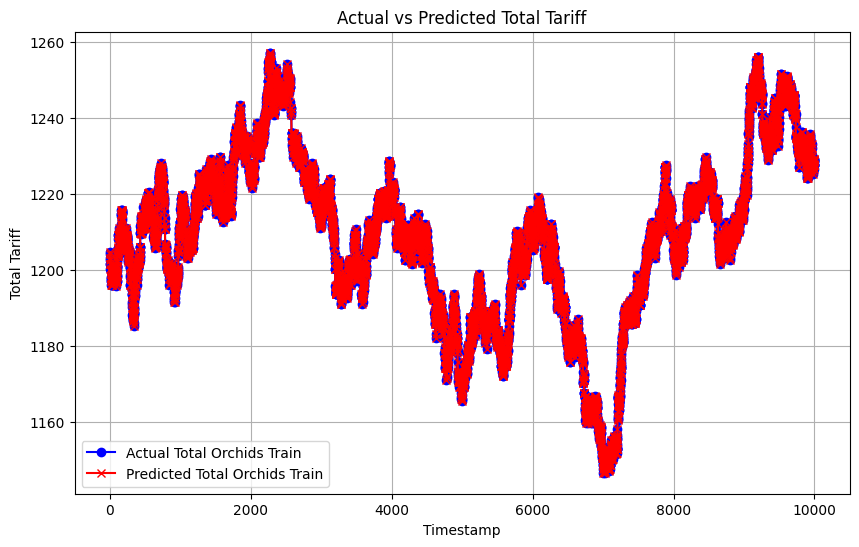

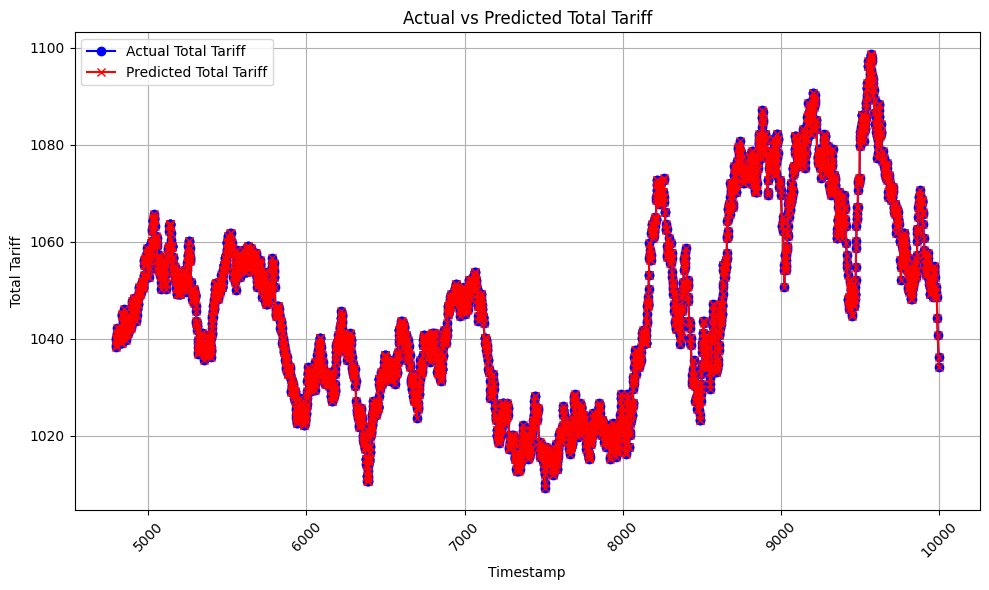

Mean Squared Error: 4.690536362532581e-26
Train Mean Squared Error: 6.619077459299934e-25


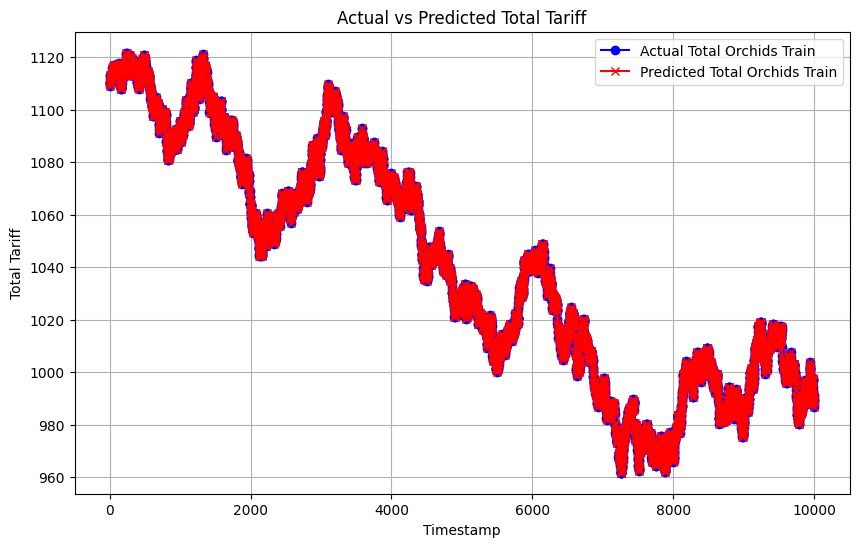

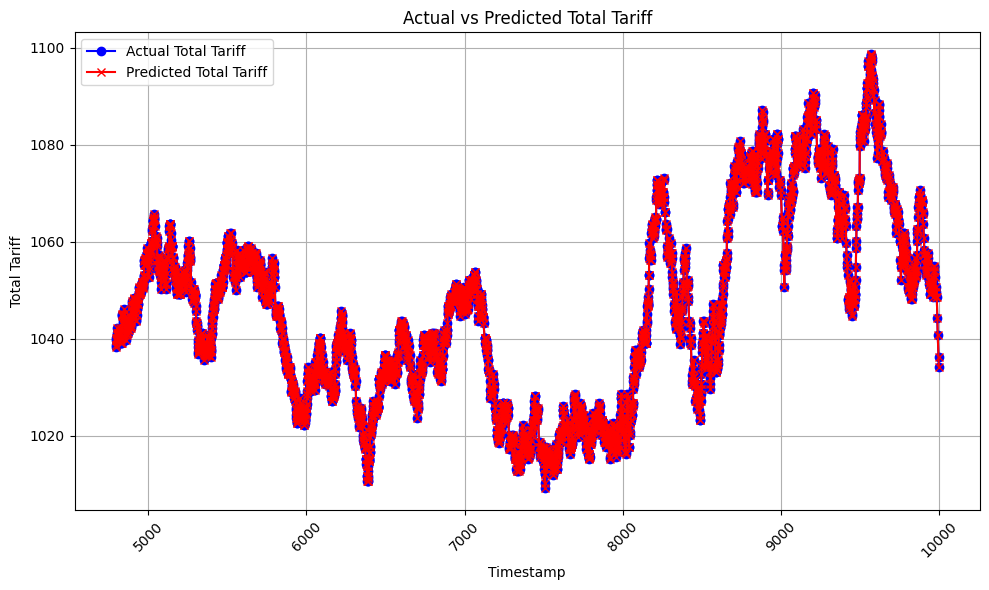

Mean Squared Error: 2.0591423661796614e-26
Train Mean Squared Error: 4.963414019013275e-26


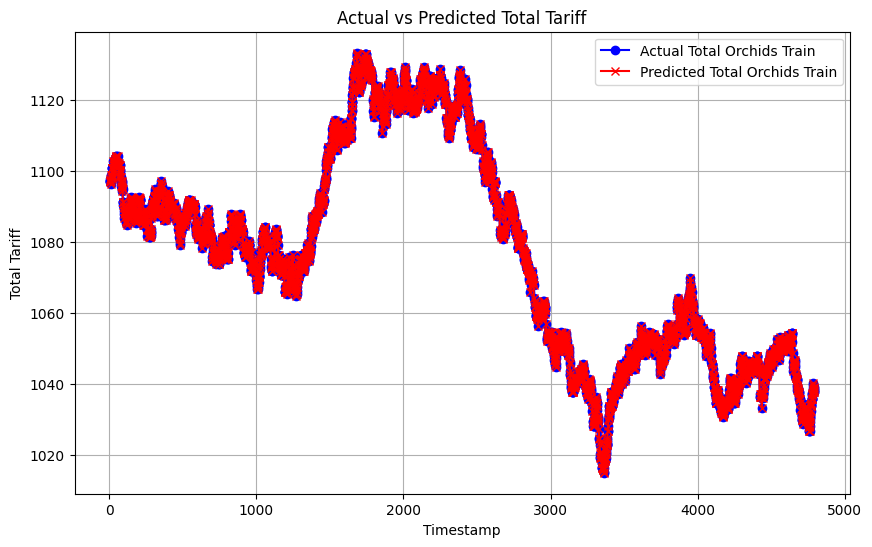

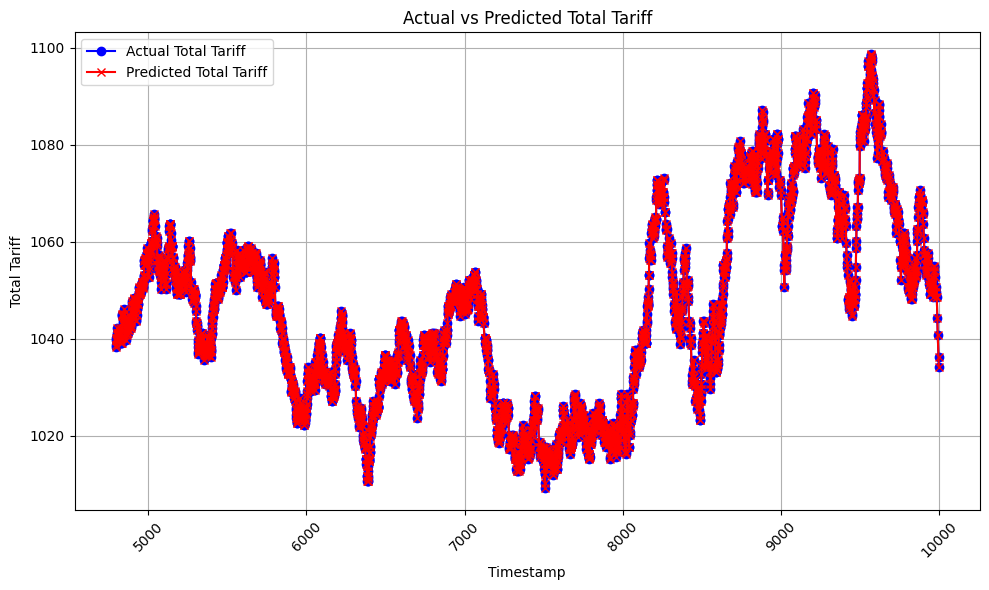

Coefficients: [-8.10874811e-13 -5.91120577e-15  4.31060886e-15 -9.60727505e-14
 -1.08227191e-14  1.46364645e-14  1.12295342e-15  3.27764434e-17
  2.22044605e-16  5.57498619e-12  2.98537860e-15 -1.22666898e-14
  3.87632699e-15  1.82030443e-12  2.77555756e-17  1.00000000e+00
  1.13485257e-14 -1.12052958e-15 -3.15193751e-17 -5.57302709e-12
 -7.88986724e-16  6.66666667e-01 -5.83203802e-16 -3.38198806e-15
  1.71391269e-16 -1.65502451e-12  0.00000000e+00  1.00000000e+00
  3.56051434e-15  3.33333333e-01  7.98068655e-15 -8.61946915e-16
  3.27485607e-16  6.45316084e-13  0.00000000e+00  3.33333333e-01
 -8.56234694e-15]
Intercept: -4.547473508864641e-13
Model Score: 1.0


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

# Initialize an empty model
model = LinearRegression(fit_intercept=True)

# Define your training dataframes
train_df1, train_df2, train_df3, test = df_1.copy(), df_2.copy(), df_3.copy()[:int(len(df_3)/2)],  df_3.copy()[int(len(df_3)/2):]

X_test = test[[i for i in train_df3.columns if i not in ['ORCHID_LAG', 'ORCHIDS', 'timestamp', 'ORCHID_CHANGE', 'LOG_ORCHID_CHANGE', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'DAY']]]
y_test = test['ORCHIDS']

# Define function to iteratively train and update the model
def train_iteratively(model, X_train, y_train, X_test, y_test):
    # Train the model with the current training set
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)
    
    # Plot the training set
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    print("Train Mean Squared Error:", train_mse)
    plt.figure(figsize=(10, 6))
    plt.plot(y_train.index, y_train.values, color='blue', label='Actual Total Orchids Train', marker='o')
    plt.plot(y_train.index, y_train_pred, color='red', label='Predicted Total Orchids Train', marker='x')
    plt.xlabel('Timestamp')
    plt.ylabel('Total Tariff')
    plt.title('Actual vs Predicted Total Tariff')
    plt.legend()
    plt.grid(True)
    

    # Plotting the actual and predicted values against timestamps using the same index
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test.values, color='blue', label='Actual Total Tariff', marker='o')
    plt.plot(y_test.index, y_pred, color='red', label='Predicted Total Tariff', marker='x')
    plt.xlabel('Timestamp')
    plt.ylabel('Total Tariff')
    plt.title('Actual vs Predicted Total Tariff')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return model

# Iteratively train and update the model using each training set
model = train_iteratively(model, train_df1[[i for i in train_df3.columns if i not in ['ORCHIDS', 'ORCHID_LAG', 'timestamp', 'ORCHID_CHANGE', 'LOG_ORCHID_CHANGE', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'DAY']]], train_df1['ORCHIDS'], X_test, y_test)
model = train_iteratively(model, train_df2[[i for i in train_df3.columns if i not in ['ORCHIDS', 'ORCHID_LAG','timestamp', 'ORCHID_CHANGE', 'LOG_ORCHID_CHANGE', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'DAY']]], train_df2['ORCHIDS'], X_test, y_test)
model = train_iteratively(model, train_df3[[i for i in train_df3.columns if i not in ['ORCHIDS', 'ORCHID_LAG','timestamp', 'ORCHID_CHANGE', 'LOG_ORCHID_CHANGE', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'DAY']]], train_df3['ORCHIDS'], X_test, y_test)


# Print the coefficients of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Model Score:", model.score(X_test, y_test))


In [47]:
starfruit_df = df[df['product'] == 'STARFRUIT']
starfruit_df['MACD'] = starfruit_df['mid_price'].ewm(span=12, adjust=False).mean() - starfruit_df['mid_price'].ewm(span=26, adjust=False).mean()
starfruit_df['signal'] = starfruit_df['MACD'].ewm(span=9, adjust=False).mean()
starfruit_df['RSI(14)'] = ta.rsi(starfruit_df['mid_price'], length=14)
starfruit_df['RSI(7)'] = ta.rsi(starfruit_df['mid_price'], length=7)

# Create figure and axes for the two subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(15, 20))

# Plot mid price on the first subplot
ax1.plot(starfruit_df.index, starfruit_df['mid_price'], color='green')
ax1.set_ylabel('Mid Price')

# Plot the difference between total bid volume and total ask volume on the second subplot
ax2.plot(starfruit_df.index, starfruit_df['total_bid_volume'] - starfruit_df['total_ask_volume'], color='blue')
ax2.set_ylabel('Bid-Ask Volume Difference')

# Plot the difference between total bid volume and total ask volume on the second subplot
ax3.plot(starfruit_df.index, starfruit_df['total_bid_volume'], color='red')

ax4.plot(starfruit_df.index, starfruit_df['total_ask_volume'], color='black')

# Show the plot
plt.show()

# Calculate SMAs
sma_3 = starfruit_df['mid_price'].rolling(window=3).mean()
sma_5 = starfruit_df['mid_price'].rolling(window=5).mean()
sma_10 = starfruit_df['mid_price'].rolling(window=10).mean()

# Plotting
fig, ax = plt.subplots(figsize=(30, 20))
plt.plot(starfruit_df['mid_price'], label='mid_price')

# Plot SMAs
plt.plot(sma_3, label='SMA 3', linestyle='--')
plt.plot(sma_5, label='SMA 5', linestyle='--')
plt.plot(sma_10, label='SMA 10', linestyle='--')

plt.legend()
plt.show()

print(starfruit_df['mid_price'].std())


period1 = starfruit_df.iloc[:100]
period1_SMA3 = period1['mid_price'].rolling(window=3).mean()
period1_SMA5 = period1['mid_price'].rolling(window=5).mean()
period1_SMA10 = period1['mid_price'].rolling(window=10).mean()
# Print MACD and signal with the mid_price above
# Create two subplots, one for mid_price and one for MACD and signal
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30, 20), sharex=True)

# Plot mid_price on the first subplot
ax1.plot(period1.index, period1['mid_price'], label='mid_price', color='blue')
ax1.plot(period1.index, period1_SMA3, label='SMA 3', linestyle='--')
ax1.plot(period1.index, period1_SMA5, label='SMA 5', linestyle='--')
ax1.plot(period1.index, period1_SMA10, label='SMA 10', linestyle='--')
ax1.legend()

# Plot MACD on the second subplot
ax2.plot(period1.index, period1['MACD'], label='MACD', color='orange')
ax2.legend()

# Plot signal on the second subplot
ax2.plot(period1.index, period1['signal'], label='signal', color='green')
ax2.legend()


ax3.plot(period1.index, period1['RSI(7)'], label='RSI(7)', color='red')
ax3.legend()
plt.show()


# Calculate daily returns
daily_returns = starfruit_df['mid_price'].pct_change()

# Calculate daily volatility (standard deviation of daily returns)
daily_volatility = daily_returns.std()

# Calculate the mean of daily volatility
mean_daily_volatility = np.mean(daily_volatility)

print("Mean of daily volatility:", mean_daily_volatility)


KeyError: 'product'

In [ ]:
starfruit_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,vwap,best_bid,best_ask,mid_price_best,median_price,spread,MACD,signal,RSI(14),RSI(7)
1,-2,0,STARFRUIT,4997,26,0.0,0.0,0.0,0.0,5003,...,5000.000000,4997.0,5003.0,5000.0,5000.0,6.000000,0.000000,0.000000,NaN,NaN
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,...,5000.156863,4997.0,5004.0,5000.5,4999.0,6.322581,0.159544,0.031909,NaN,NaN
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,0.0,0.0,5003,...,4999.516129,4996.0,5003.0,4999.5,4997.0,6.967742,0.123181,0.050163,NaN,NaN
7,-2,300,STARFRUIT,4996,27,0.0,0.0,0.0,0.0,5003,...,4999.500000,4996.0,5003.0,4999.5,4999.5,7.000000,0.053401,0.050811,NaN,NaN
9,-2,400,STARFRUIT,4995,20,0.0,0.0,0.0,0.0,5002,...,4998.500000,4995.0,5002.0,4998.5,4998.5,7.000000,-0.081650,0.024319,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,0,999500,STARFRUIT,5049,28,0.0,0.0,0.0,0.0,5056,...,5052.500000,5049.0,5056.0,5052.5,5052.5,7.000000,-0.446447,-0.491025,48.529281,51.834261
59992,0,999600,STARFRUIT,5048,9,5047.0,27.0,0.0,0.0,5054,...,5050.261538,5047.0,5054.0,5050.5,5048.0,6.750000,-0.518817,-0.496583,42.312390,38.011770
59995,0,999700,STARFRUIT,5053,1,5048.0,26.0,0.0,0.0,5054,...,5051.490566,5048.0,5055.0,5051.5,5053.5,6.737892,-0.370175,-0.471302,53.096980,59.178504
59996,0,999800,STARFRUIT,5047,27,0.0,0.0,0.0,0.0,5052,...,5050.527273,5047.0,5054.0,5050.5,5052.0,6.928571,-0.568587,-0.490759,40.160303,36.141773


In [ ]:
amethysts_df = df[df['product'] == 'AMETHYSTS']
amethysts_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,volume_weighted_bid,volume_weighted_ask,total_bid_volume,total_ask_volume,vwap,best_bid,best_ask,mid_price_best,median_price,spread
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,0.0,0.0,10004,...,9995.038462,10004.961538,26.0,26.0,10000.000000,9995.0,10005.0,10000.0,10000.0,9.923077
2,-2,100,AMETHYSTS,10000,5,9995.0,20.0,0.0,0.0,10005,...,9996.000000,10005.000000,25.0,20.0,10000.000000,9995.0,10005.0,10000.0,10000.0,9.000000
5,-2,200,AMETHYSTS,9996,1,9995.0,30.0,0.0,0.0,10004,...,9995.032258,10004.967742,31.0,31.0,10000.000000,9995.0,10005.0,10000.0,10000.0,9.935484
6,-2,300,AMETHYSTS,9996,1,9995.0,26.0,0.0,0.0,10004,...,9995.037037,10004.962963,27.0,27.0,10000.000000,9995.0,10005.0,10000.0,10000.0,9.925926
8,-2,400,AMETHYSTS,9995,20,0.0,0.0,0.0,0.0,9998,...,9995.000000,10003.500000,20.0,32.0,10000.230769,9995.0,10005.0,10000.0,10000.0,8.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59991,0,999500,AMETHYSTS,9995,28,0.0,0.0,0.0,0.0,10002,...,9995.000000,10004.470588,28.0,34.0,10000.193548,9995.0,10005.0,10000.0,10002.0,9.470588
59993,0,999600,AMETHYSTS,9996,2,9995.0,27.0,0.0,0.0,10002,...,9995.068966,10004.656250,29.0,32.0,10000.098361,9995.0,10005.0,10000.0,10002.0,9.587284
59994,0,999700,AMETHYSTS,9996,2,9995.0,24.0,0.0,0.0,10004,...,9995.076923,10004.923077,26.0,26.0,10000.000000,9995.0,10005.0,10000.0,10000.0,9.846154
59997,0,999800,AMETHYSTS,9995,27,0.0,0.0,0.0,0.0,10005,...,9995.000000,10005.000000,27.0,27.0,10000.000000,9995.0,10005.0,10000.0,10000.0,10.000000


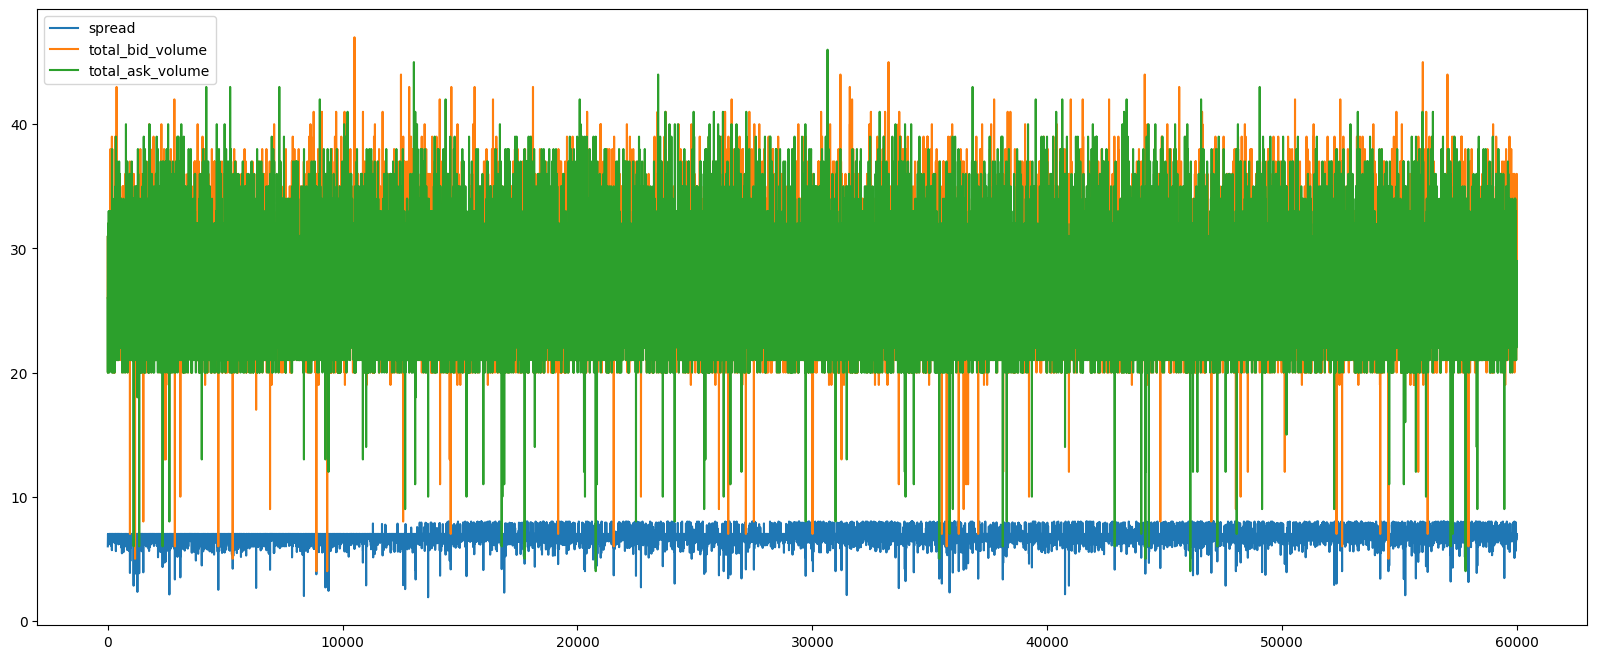

Average Spread: 6.862003774087599
Standard Deviation Spread: 0.3838702273417948


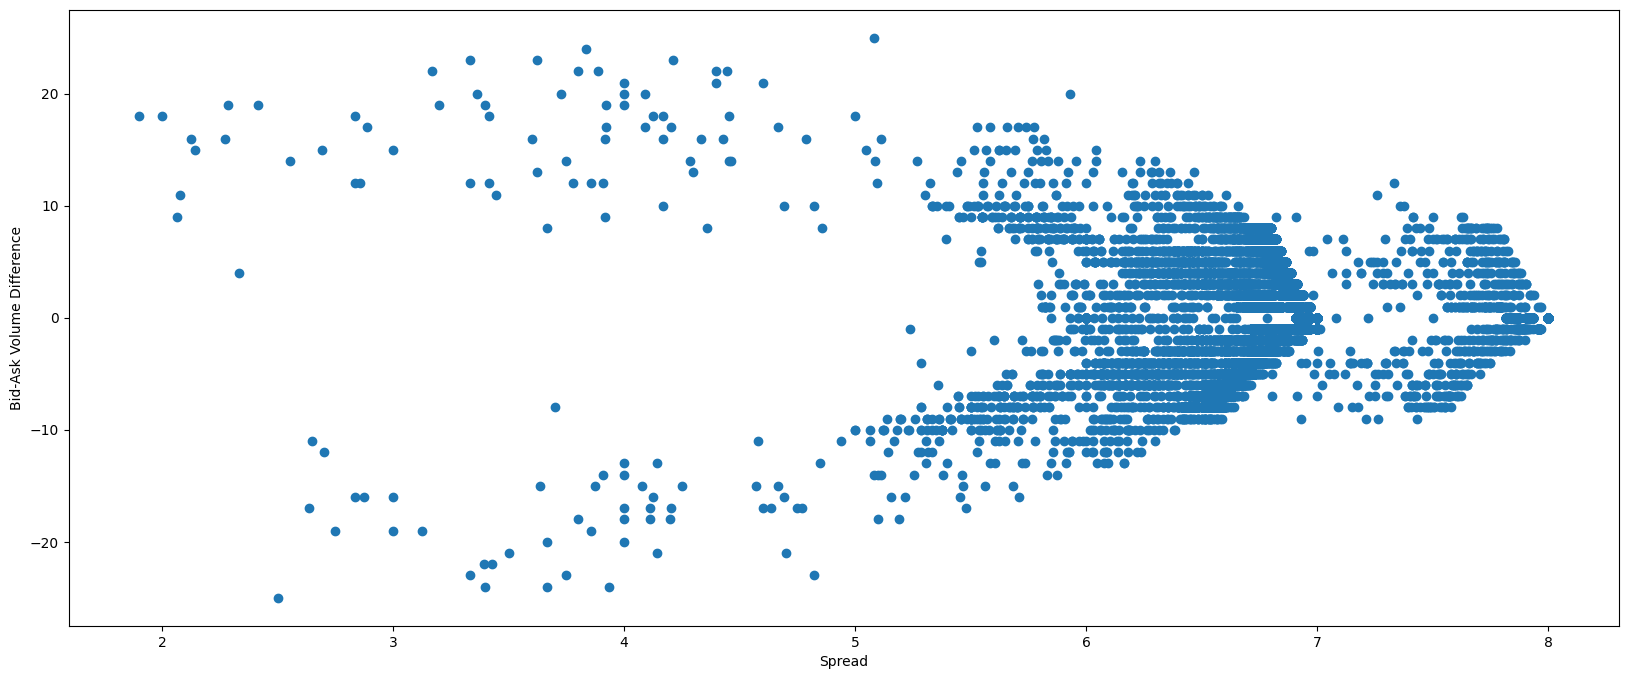

In [ ]:
# Descriptive Statistics , finding mid_price, spread and volume 

# Plot spread and volume
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(starfruit_df['spread'], label='spread')
plt.plot(starfruit_df['total_bid_volume'], label='total_bid_volume')
plt.plot(starfruit_df['total_ask_volume'], label='total_ask_volume')
plt.legend()
plt.show()

# Average spread
print("Average Spread: " + str(starfruit_df['spread'].mean()))
print("Standard Deviation Spread: " + str(starfruit_df['spread'].std()))


# Plot the spread against difference in bid and ask volume
fig, ax = plt.subplots(figsize=(20, 8))
plt.scatter(starfruit_df['spread'], starfruit_df['total_bid_volume'] - starfruit_df['total_ask_volume'])
plt.xlabel('Spread')
plt.ylabel('Bid-Ask Volume Difference')
plt.show()


        

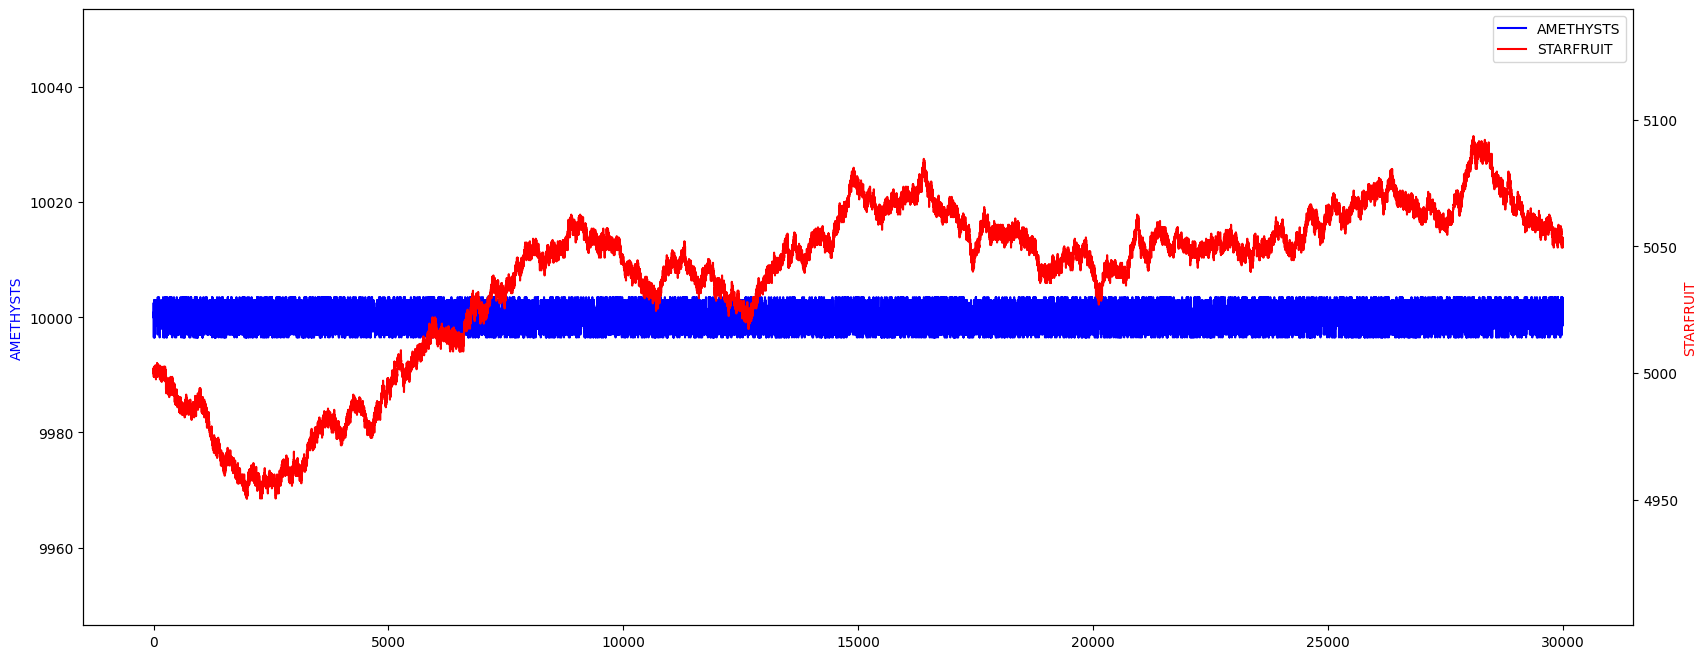

In [ ]:
# Pipeline for Pairs Trading
#print(os.getcwd())
from statsmodels.tsa.stattools import coint
import pandas as pd
import numpy as np

product1, product2 = 'AMETHYSTS', 'STARFRUIT'
p1_df = df[df['product'] == product1].reset_index(drop=True)
p2_df = df[df['product'] == product2].reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=(20, 8))

# Plot both mid prices on the same plot
ax1.plot(p1_df['mid_price'], label=product1, color='blue')
ax1.set_ylabel(product1, color='blue')

# Create a twin axes sharing the x-axis
ax2 = ax1.twinx()

ax2.plot(p2_df['mid_price'], label=product2, color='red')
ax2.set_ylabel(product2, color='red')

# Adjust y-axis limits for each product
min1, max1 = p1_df['mid_price'].min(), p1_df['mid_price'].max()
min2, max2 = p2_df['mid_price'].min(), p2_df['mid_price'].max()
ax1.set_ylim(min1 - 50, max1 + 50)  # Set limits for product1
ax2.set_ylim(min2 - 50, max2 + 50)    # Set limits for product2

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Show the plot
plt.show()


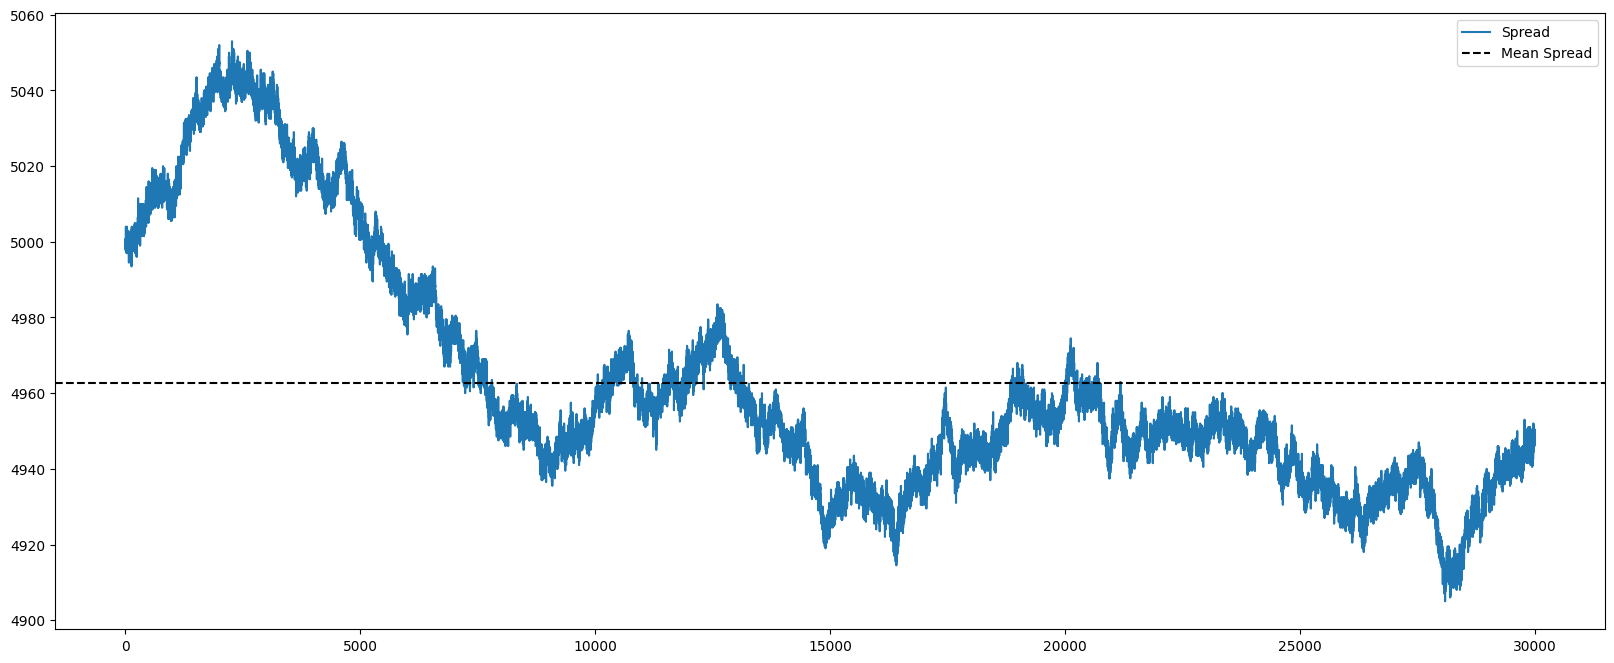

Cointegration Test P-Value: 0.000000
Standard Deviation of Spread: 32.32967868935901
ADF P-Value: 0.601950
Regression Formula:
const        3879.940537
mid_price       0.115749
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              mid_price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8627
Date:                Thu, 11 Apr 2024   Prob (F-statistic):              0.353
Time:                        22:49:24   Log-Likelihood:            -1.4682e+05
No. Observations:               30000   AIC:                         2.936e+05
Df Residuals:                   29998   BIC:                         2.937e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 c

In [ ]:
# Plot the spread
fig, ax = plt.subplots(figsize=(20, 8))
spread = p1_df['mid_price'] - p2_df['mid_price']
plt.plot(spread, label='Spread')
plt.axhline(spread.mean(), color='black', linestyle='--', label='Mean Spread')
plt.legend()
plt.show()

print('Cointegration Test P-Value: %f' % coint(p1_df['mid_price'], p2_df['mid_price'])[1])
print(f"Standard Deviation of Spread: {spread.std()}")

# ADF Fuller on Stationarity of Spread Time Series
from statsmodels.tsa.stattools import adfuller

result = adfuller(spread)
print('ADF P-Value: %f' % result[1])


# OLS Regression on the 2 Products
import statsmodels.api as sm

X = p1_df['mid_price']
y = p2_df['mid_price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

# Print out the formula
print("Regression Formula:")
print(model.params)
print(model.summary())

In [ ]:
#Load from Backtest Mid_prices
# p1 = "AMETHYSTS"
# p2 = "STARFRUIT"

# p1_df = pd.read_csv(f"{p1}_round_1_day_-2.csv")
# p2_df = pd.read_csv(f"{p2}_round_1_day_-2.csv")

# p1_df['timestamp'] = (p1_df.index * 100)
# p1_df.rename(columns={p1: 'mid_price'}, inplace=True)

# p2_df['timestamp'] = (p2_df.index * 100)
# p2_df.rename(columns={p2: 'mid_price'}, inplace=True)


In [ ]:
# Using Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

CURR_MIN = 10000000
Y_PRED = None
CURR_N = 0
Y_TEST = None
best_coef = None
model_intercept = None
Y_TRAIN = None
Y_TRAIN_PRED = None
best_mape = 10000000
best_bic = 10000000
# Using Grid Search to find the best parameters for Xt = bXt-1 + cXt-2 + ... + dXt-n + e, where n is the number of lags, and Xt is itself
directional_accuracy = {}

results = {
    'n': [],
    'mse': [],
    'mape': [],
    'rsquared': [],
    'bic': [],
    'coefficients': [],
    'intercept': [],
    'Y_PRED': [],
    'Y_TEST': [],
    'Y_TRAIN': [],
    'Y_TRAIN_PRED': [],
    'Type': []
    
}

p2_df = df
for n in range(1, 20):
    X = pd.DataFrame(p2_df['ORCHIDS'])
    for i in range(1, n+1):
        curr_cols = X.columns   
        X = pd.concat([X, p2_df['ORCHIDS'].shift(i)], axis=1) # Shift the mid price by i periods and concatenate to X # change column name
        X.columns = curr_cols.append(pd.Index([f'lag_{i}'])) # Change the column name to lag_i
    X = X.shift(1)
    X.dropna(inplace=True)
    X = X.reset_index(drop=True) # Drop the rows with NaN values
    y = X['ORCHIDS']
    X = X.iloc[:, 1:]
    

    
    #print(X.head())
    #print(y.head())
    #print(X.shape, y.shape)
    
    # Add a constant to the X matrix
    X = sm.add_constant(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = ElasticNetCV(cv=5, random_state=0, l1_ratio=[.1, .5, .7, .9, .95, .99, 1], fit_intercept=True)
    model2 = sm.GLM(y_train, X_train, family=sm.families.Gaussian())
    
    model2 = model2.fit()
    model.fit(X_train, y_train)
    #print(f"X Coefficients: ")
    #print(model.coef_)
    #print(f"X Intercept: ")
    #print(model.intercept_)
    
    
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    rsquared = model.score(X_test, y_test)
    print()
    
    y_pred_train2 = model2.predict(X_train)
    y_pred2 = model2.predict(X_test)
    mse2 = mean_squared_error(y_test, y_pred2)
    mape2 = np.mean(np.abs((y_test - y_pred2) / y_test)) * 100
    #print(model2.summary())
    rsquared2 = model2.pseudo_rsquared()
    
    print()
    
    
    # For Elastic Net
    print(f"n={n}, mse={mse} mape={mape} rsquared={rsquared}")
    print(f"Model Alpha: {model.alpha_} Model L1 Ratio: {model.l1_ratio_}")
    BIC = len(y_test) * np.log(mse) + n * np.log(len(y_test))
    print(f"n={n}, BIC={BIC}")
    count = 0
    y_pred = pd.Series(y_pred)
    y_pred.index = y_test.index
    
    
    # For GLM
    print(f"n={n}, mse={mse2} mape={mape2} rsquared={rsquared2}")
    print(f"Model Intercept: {model2.params[0]}")
    BIC2 = model2.bic
    print(f"n={n}, BIC={BIC2}")
    count = 0
    y_pred2 = pd.Series(y_pred2)
    y_pred2.index = y_test.index
    
    
    for i in range(1, len(y_test)):
        if (y_test.iloc[i] -y_test.iloc[i-1]) * (y_pred.iloc[i] - y_test.iloc[i-1]) > 0:
            count += 1
    directional_accuracy[n] = count/len(y_test)
    
    # Store the results elastic net
    results['n'].append(n)
    results['mse'].append(mse)
    results['mape'].append(mape)
    results['rsquared'].append(rsquared)
    results['bic'].append(BIC)
    results['coefficients'].append(list(model.coef_))
    results['intercept'].append(model.intercept_)
    results['Y_PRED'].append(y_pred)
    results['Y_TEST'].append(y_test)
    results['Y_TRAIN'].append(y_train)
    results['Y_TRAIN_PRED'].append(y_pred_train)
    results['Type'].append('Elastic Net')
    
    
    # Store results for GLM
    # results['n'].append(n)
    # results['mse'].append(mse2)
    # results['mape'].append(mape2)
    # results['rsquared'].append(rsquared2)
    # results['bic'].append(BIC2)
    # results['coefficients'].append(list(model2.params))
    # results['intercept'].append(model2.params[0])
    # results['Y_PRED'].append(y_pred2)
    # results['Y_TEST'].append(y_test)
    # results['Y_TRAIN'].append(y_train)
    # results['Y_TRAIN_PRED'].append(y_pred_train2)
    # results['Type'].append('GLM')
    
    
    
#print(f"Best n: {CURR_N}, Best MSE: {CURR_MIN}")
#print(f"Best Coefficients: {list(best_coef)}")
#print(f"Model Intercept: {model.intercept_}")

# Get the best results getting the minimum model with the lowest sum rankings of mse, mape, rsquared and bic
best_results = pd.DataFrame(results)
best_results['mse_rank'] = best_results['mse'].rank(ascending=False)
best_results['mape_rank'] = best_results['mape'].rank(ascending=False)
best_results['rsquared_rank'] = best_results['rsquared'].rank(ascending=False)
best_results['bic_rank'] = best_results['bic'].rank(ascending=True)
best_results['sum_rank'] = best_results['mse_rank'] + best_results['mape_rank'] + best_results['bic_rank'] + best_results['rsquared_rank']
best_results.sort_values('sum_rank', inplace=True)
best_results.reset_index(drop=True)

# Get the best results
print(best_results.head(10))

print(f"Best n: {best_results['n'].iloc[0]}, Best MSE: {best_results['mse'].iloc[0]}")
print(f"Best Coefficients: {list(best_results['coefficients'].iloc[0])}")
print(f"Model Intercept: {best_results['intercept'].iloc[0]}")
print(f"Best MAPE: {best_results['mape'].iloc[0]}")
print(f"Best BIC: {best_results['bic'].iloc[0]}")
print(f"Best R-Squared: {best_results['rsquared'].iloc[0]}")





n=1, mse=1.360236704088222 mape=0.08505905796331961 rsquared=0.9960663442750654
Model Alpha: 7.273327858787761 Model L1 Ratio: 1.0
n=1, BIC=1854.9597304959755
n=1, mse=1.3546816158032284 mape=0.08399919981420638 rsquared=1.0
Model Intercept: 0.16291543204806658
n=1, BIC=-192328.766165261


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=2, mse=1.3604590219556363 mape=0.08507190187454633 rsquared=0.9960661151911435
Model Alpha: 7.2731958944515 Model L1 Ratio: 1.0
n=2, BIC=1864.3319831727215
n=2, mse=1.354916932869077 mape=0.0840134212744086 rsquared=1.0
Model Intercept: 0.1636966433835596
n=2, BIC=-192321.81821886968


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=3, mse=1.3604390240145816 mape=0.08506998203507392 rsquared=0.9960661730169179
Model Alpha: 7.2732068968619235 Model L1 Ratio: 1.0
n=3, BIC=1872.9433008298956
n=3, mse=1.3547818147184256 mape=0.08403745034730709 rsquared=1.0
Model Intercept: 0.1626791855276073
n=3, BIC=-192302.82484564467


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=4, mse=1.3604384232954574 mape=0.0850699261574621 rsquared=0.9960661747539492
Model Alpha: 7.2732178758479105 Model L1 Ratio: 1.0
n=4, BIC=1881.6401662013404
n=4, mse=1.3547568818507356 mape=0.08403690257541682 rsquared=1.0
Model Intercept: 0.16283029781802372
n=4, BIC=-192281.69313326117


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=5, mse=1.3604289907814797 mape=0.08506901874018222 rsquared=0.9960662020288783
Model Alpha: 7.273228831403494 Model L1 Ratio: 1.0
n=5, BIC=1890.298080183873
n=5, mse=1.3548035261674654 mape=0.08405780360019821 rsquared=1.0
Model Intercept: 0.1621151318415413
n=5, BIC=-192261.61008729314


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=6, mse=1.36041858756452 mape=0.08506799381109459 rsquared=0.996066232110679
Model Alpha: 7.2732449975113544 Model L1 Ratio: 1.0
n=6, BIC=1898.9517126840258
n=6, mse=1.3546283345932075 mape=0.08406018042112917 rsquared=1.0
Model Intercept: 0.160730607693381
n=6, BIC=-192243.52353476622


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=7, mse=1.360577576805386 mape=0.08507189183614866 rsquared=0.9960662071631672
Model Alpha: 7.273113166526215 Model L1 Ratio: 1.0
n=7, BIC=1908.0433176991983
n=7, mse=1.354825385211799 mape=0.08407125079504106 rsquared=1.0
Model Intercept: 0.1608693418979783
n=7, BIC=-192235.8202559907


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=8, mse=1.3605597608004378 mape=0.08507017592371419 rsquared=0.9960662586739916
Model Alpha: 7.273120538394879 Model L1 Ratio: 1.0
n=8, BIC=1916.6641116915323
n=8, mse=1.3553200751306462 mape=0.08410791961285403 rsquared=1.0
Model Intercept: 0.1605049861389911
n=8, BIC=-192217.22594108235


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=9, mse=1.360556108202874 mape=0.0850698585846839 rsquared=0.9960662692346258
Model Alpha: 7.273117290468307 Model L1 Ratio: 1.0
n=9, BIC=1925.3473546509576
n=9, mse=1.3554971314053679 mape=0.08415243285859289 rsquared=1.0
Model Intercept: 0.16319810238382793
n=9, BIC=-192206.24835837033


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=10, mse=1.3605561903734722 mape=0.0850698600658556 rsquared=0.9960662689970486
Model Alpha: 7.273108592982068 Model L1 Ratio: 1.0
n=10, BIC=1934.047065027376
n=10, mse=1.3557873202609492 mape=0.08419400120387094 rsquared=1.0
Model Intercept: 0.16169669023630348
n=10, BIC=-192188.56618722825


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=11, mse=1.360556984376187 mape=0.08506992189481462 rsquared=0.9960662667013749
Model Alpha: 7.273105261328865 Model L1 Ratio: 1.0
n=11, BIC=1942.7499140315801
n=11, mse=1.3557767795134 mape=0.0841960085651741 rsquared=1.0
Model Intercept: 0.1610000097163038
n=11, BIC=-192168.4096685702


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=12, mse=1.3607775489758192 mape=0.08508254520167408 rsquared=0.9960660638129504
Model Alpha: 7.272960414033786 Model L1 Ratio: 1.0
n=12, BIC=1952.1116451586306
n=12, mse=1.3561616681513637 mape=0.08421915953584415 rsquared=1.0
Model Intercept: 0.15995194234199062
n=12, BIC=-192159.9622655896


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=13, mse=1.3607784591631547 mape=0.08508261802412247 rsquared=0.9960660611816468
Model Alpha: 7.272967637513936 Model L1 Ratio: 1.0
n=13, BIC=1960.8148384167373
n=13, mse=1.3560192693930186 mape=0.08421500227783416 rsquared=1.0
Model Intercept: 0.15985816313452506
n=13, BIC=-192140.0474469603


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=14, mse=1.3607806993918752 mape=0.08508280215111655 rsquared=0.9960660547052635
Model Alpha: 7.272985311938388 Model L1 Ratio: 1.0
n=14, BIC=1969.5238941833863
n=14, mse=1.356497332180678 mape=0.0842643424818519 rsquared=1.0
Model Intercept: 0.1606234283227097
n=14, BIC=-192129.04659678484


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=15, mse=1.3607801374851456 mape=0.08508274973972568 rsquared=0.9960660563297064
Model Alpha: 7.273009781537488 Model L1 Ratio: 1.0
n=15, BIC=1978.2205987900034
n=15, mse=1.3568634378659061 mape=0.08429430953379484 rsquared=1.0
Model Intercept: 0.1617984338951816
n=15, BIC=-192110.8508670611


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=16, mse=1.360779575861336 mape=0.0850826973451832 rsquared=0.9960660579533311
Model Alpha: 7.273034229938285 Model L1 Ratio: 1.0
n=16, BIC=1986.9173046426433
n=16, mse=1.3569222864787973 mape=0.08430639828768403 rsquared=1.0
Model Intercept: 0.160476756358662
n=16, BIC=-192093.27272469326


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=17, mse=1.3609791644285052 mape=0.0850904240931237 rsquared=0.9960658948625737
Model Alpha: 7.272910437340483 Model L1 Ratio: 1.0
n=17, BIC=1996.185122563958
n=17, mse=1.3571148850076646 mape=0.08431716633517718 rsquared=1.0
Model Intercept: 0.1612625270577155
n=17, BIC=-192083.58921407734


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=18, mse=1.3609808498730804 mape=0.08509056308351692 rsquared=0.9960658899905549
Model Alpha: 7.2729399327803055 Model L1 Ratio: 1.0
n=18, BIC=2004.8915639024822
n=18, mse=1.3572140177998415 mape=0.08432418705985534 rsquared=1.0
Model Intercept: 0.1595389073957436
n=18, BIC=-192066.72422485595


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=19, mse=1.3609788923005146 mape=0.08509039305838408 rsquared=0.9960658956491987
Model Alpha: 7.272971081756807 Model L1 Ratio: 1.0
n=19, BIC=2013.5819527091144
n=19, mse=1.357159795019325 mape=0.0843226619812519 rsquared=1.0
Model Intercept: 0.16028811532740905
n=19, BIC=-192046.77396972003
     n       mse      mape  rsquared          bic  \
6    7  1.360578  0.085072  0.996066  1908.043318   
7    8  1.360560  0.085070  0.996066  1916.664112   
1    2  1.360459  0.085072  0.996066  1864.331983   
13  14  1.360781  0.085083  0.996066  1969.523894   
16  17  1.360979  0.085090  0.996066  1996.185123   
17  18  1.360981  0.085091  0.996066  2004.891564   
0    1  1.360237  0.085059  0.996066  1854.959730   
14  15  1.360780  0.085083  0.996066  1978.220599   
12  13  1.360778  0.085083  0.996066  1960.814838   
11  12  1.360778  0.085083  0.996066  1952.111645   

                                         coefficients  intercept  \
6   [0.0, 0.9988442336404714, 0.0, 3.4701001381605..

C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


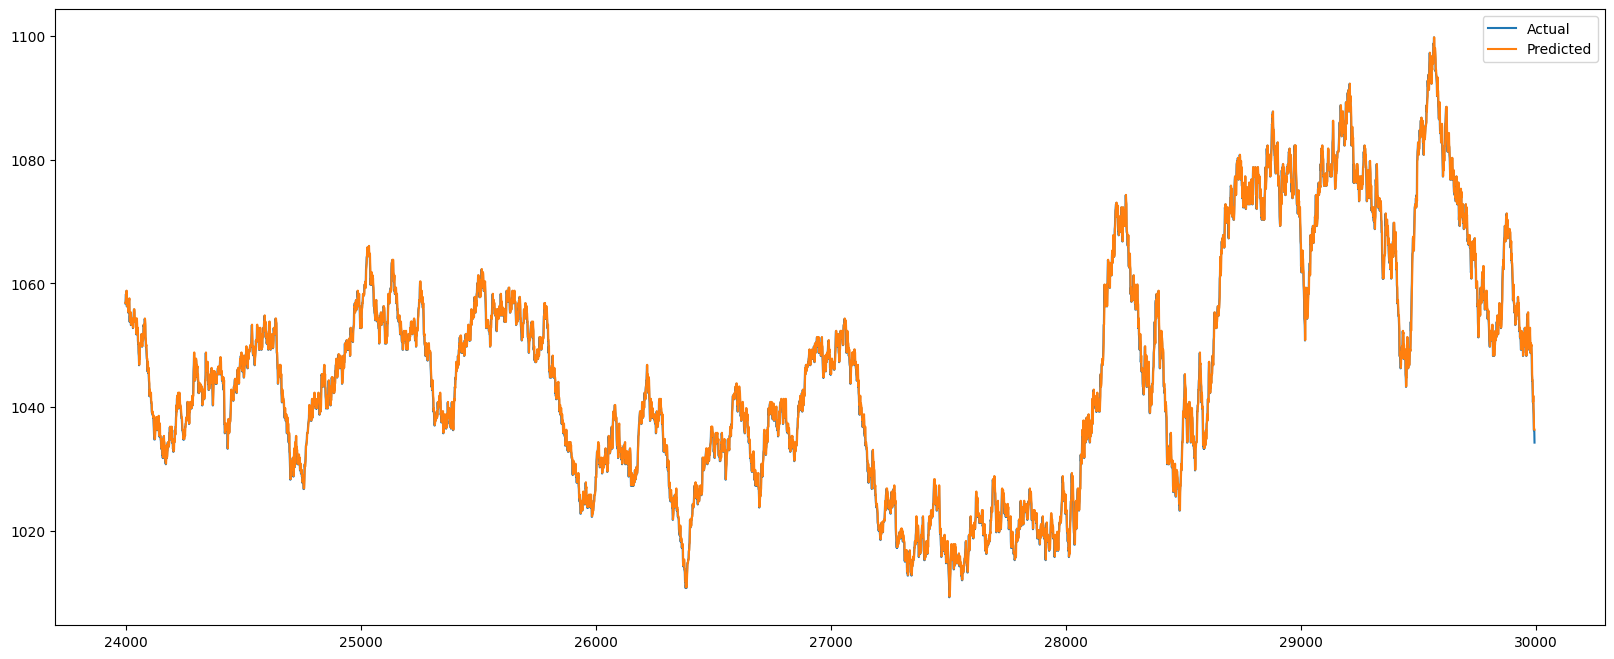

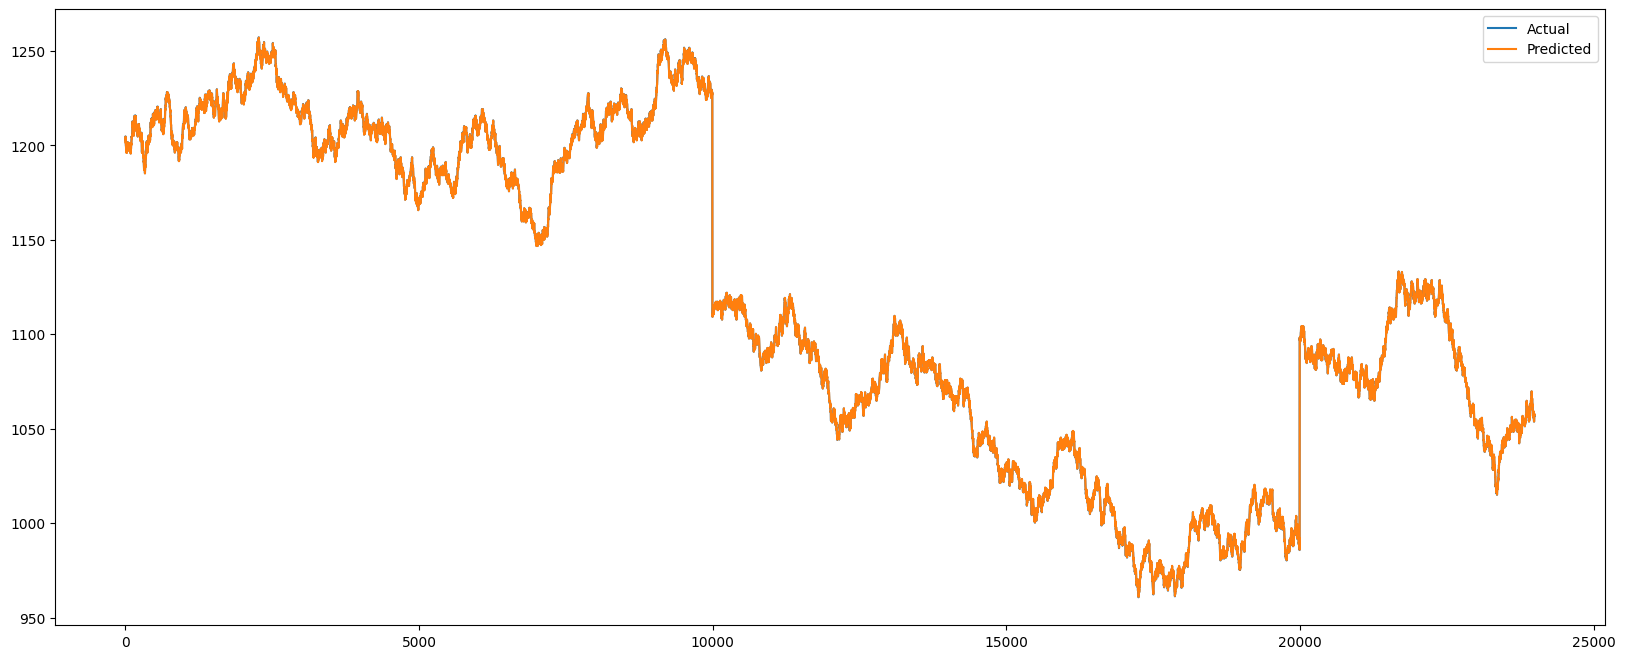

Percentage of times the predicted change same direction as the actual change: 0.42157026171028505
Percentage of times the predicted change same direction as the actual change in Train: 0.4022337056176029
{1: 0.42142976170638224, 2: 0.4215, 3: 0.4215, 4: 0.4215, 5: 0.4215, 6: 0.4215, 7: 0.42157026171028505, 8: 0.42157026171028505, 9: 0.42157026171028505, 10: 0.42157026171028505, 11: 0.42157026171028505, 12: 0.4214738246082027, 13: 0.4214738246082027, 14: 0.4214738246082027, 15: 0.4214738246082027, 16: 0.4214738246082027, 17: 0.42137735534433884, 18: 0.42137735534433884, 19: 0.42137735534433884}
n=7, Coefficients: [0.0, 0.9988442336404714, 0.0, 3.4701001381605283e-06, 0.0, 1.585303603986671e-06, 2.2279276972481416e-06, 1.1108665231066084e-06], Intercept: 1.2767354851785058
[7, [0.9988442336404714, 3.4701001381605283e-06, 1.585303603986671e-06, 2.2279276972481416e-06, 1.1108665231066084e-06], 1.2767354851785058]
MSE: 1.360577576805386, MAPE: 0.08507189183614866, R-Squared: 0.9960662071631

In [ ]:
# Plot the best results
Y_PRED = best_results['Y_PRED'].iloc[0]
Y_TEST = best_results['Y_TEST'].iloc[0]
Y_TRAIN = best_results['Y_TRAIN'].iloc[0]
Y_TRAIN_PRED = best_results['Y_TRAIN_PRED'].iloc[0]
n = best_results['n'].iloc[0]

fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(Y_TEST, label='Actual')
plt.plot(Y_PRED, label='Predicted')
plt.legend()
plt.show()




fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(Y_TRAIN, label='Actual')
plt.plot(Y_TRAIN_PRED, label='Predicted')
plt.legend()
plt.show()


# Count the number of times the predicted change same direction as the actual change
count = 0
for i in range(1, len(Y_TEST)):
    if (Y_TEST.iloc[i] - Y_TEST.iloc[i-1]) * (Y_PRED.iloc[i] - Y_TEST.iloc[i-1]) > 0:
        count += 1
        
print(f"Percentage of times the predicted change same direction as the actual change: {count/len(Y_TEST)}")
count = 0
for i in range(1, len(Y_TRAIN)):
    if (Y_TRAIN.iloc[i] - Y_TRAIN.iloc[i-1]) * (Y_TRAIN_PRED[i] - Y_TRAIN.iloc[i-1]) > 0:
        count += 1
        
print(f"Percentage of times the predicted change same direction as the actual change in Train: {count/len(Y_TRAIN)}")
print(directional_accuracy)




top_results = best_results.head(10).iloc[:, :7]

# Iterate through and print out n, coefficients, intercept
for i in range(len(top_results)):
    print(f"n={top_results['n'].iloc[i]}, Coefficients: {list(top_results['coefficients'].iloc[i])}, Intercept: {top_results['intercept'].iloc[i]}")
    print(f"[{top_results['n'].iloc[i]}, {[i for i in list(top_results['coefficients'].iloc[i]) if i != 0.0]}, {top_results['intercept'].iloc[i]}]")
    print(f"MSE: {top_results['mse'].iloc[i]}, MAPE: {top_results['mape'].iloc[i]}, R-Squared: {top_results['rsquared'].iloc[i]}, BIC: {top_results['bic'].iloc[i]}")
    print()

In [ ]:
# Using Linear Regression for VWAP

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

CURR_MIN = 10000000
Y_PRED = None
CURR_N = 0
Y_TEST = None
best_coef = None
model_intercept = None
Y_TRAIN = None
Y_TRAIN_PRED = None
best_mape = 10000000
best_bic = 10000000
# Using Grid Search to find the best parameters for Xt = bXt-1 + cXt-2 + ... + dXt-n + e, where n is the number of lags, and Xt is itself
directional_accuracy = {}

results = {
    'n': [],
    'mse': [],
    'mape': [],
    'rsquared': [],
    'bic': [],
    'coefficients': [],
    'intercept': [],
    'Y_PRED': [],
    'Y_TEST': [],
    'Y_TRAIN': [],
    'Y_TRAIN_PRED': [],
    'Type': []
    
}
for n in range(1, 20):
    X = pd.DataFrame(p2_df['vwap'])
    for i in range(1, n+1):
        curr_cols = X.columns   
        X = pd.concat([X, p2_df['vwap'].shift(i)], axis=1) # Shift the mid price by i periods and concatenate to X # change column name
        X.columns = curr_cols.append(pd.Index([f'lag_{i}'])) # Change the column name to lag_i
    X = X.shift(1)
    X.dropna(inplace=True)
    X = X.reset_index(drop=True) # Drop the rows with NaN values
    y = X['vwap']
    X = X.iloc[:, 1:]
    

    
    #print(X.head())
    #print(y.head())
    #print(X.shape, y.shape)
    
    # Add a constant to the X matrix
    X = sm.add_constant(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = ElasticNetCV(cv=5, random_state=0, l1_ratio=[.1, .5, .7, .9, .95, .99, 1], fit_intercept=True)
    model2 = sm.GLM(y_train, X_train, family=sm.families.Gaussian())
    
    model2 = model2.fit()
    model.fit(X_train, y_train)
    #print(f"X Coefficients: ")
    #print(model.coef_)
    #print(f"X Intercept: ")
    #print(model.intercept_)
    
    
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    rsquared = model.score(X_test, y_test)
    print()
    
    y_pred_train2 = model2.predict(X_train)
    y_pred2 = model2.predict(X_test)
    mse2 = mean_squared_error(y_test, y_pred2)
    mape2 = np.mean(np.abs((y_test - y_pred2) / y_test)) * 100
    #print(model2.summary())
    rsquared2 = model2.pseudo_rsquared()
    
    print()
    
    
    # For Elastic Net
    print(f"n={n}, mse={mse} mape={mape} rsquared={rsquared}")
    print(f"Model Alpha: {model.alpha_} Model L1 Ratio: {model.l1_ratio_}")
    BIC = len(y_test) * np.log(mse) + n * np.log(len(y_test))
    print(f"n={n}, BIC={BIC}")
    count = 0
    y_pred = pd.Series(y_pred)
    y_pred.index = y_test.index
    
    
    # For GLM
    print(f"n={n}, mse={mse2} mape={mape2} rsquared={rsquared2}")
    print(f"Model Intercept: {model2.params[0]}")
    BIC2 = model2.bic
    print(f"n={n}, BIC={BIC2}")
    count = 0
    y_pred2 = pd.Series(y_pred2)
    y_pred2.index = y_test.index
    
    
    for i in range(1, len(y_test)):
        if (y_test.iloc[i] -y_test.iloc[i-1]) * (y_pred.iloc[i] - y_test.iloc[i-1]) > 0:
            count += 1
    directional_accuracy[n] = count/len(y_test)
    
    # Store the results elastic net
    results['n'].append(n)
    results['mse'].append(mse)
    results['mape'].append(mape)
    results['rsquared'].append(rsquared)
    results['bic'].append(BIC)
    results['coefficients'].append(list(model.coef_))
    results['intercept'].append(model.intercept_)
    results['Y_PRED'].append(y_pred)
    results['Y_TEST'].append(y_test)
    results['Y_TRAIN'].append(y_train)
    results['Y_TRAIN_PRED'].append(y_pred_train)
    results['Type'].append('Elastic Net')
    
    
    # Store results for GLM
    # results['n'].append(n)
    # results['mse'].append(mse2)
    # results['mape'].append(mape2)
    # results['rsquared'].append(rsquared2)
    # results['bic'].append(BIC2)
    # results['coefficients'].append(list(model2.params))
    # results['intercept'].append(model2.params[0])
    # results['Y_PRED'].append(y_pred2)
    # results['Y_TEST'].append(y_test)
    # results['Y_TRAIN'].append(y_train)
    # results['Y_TRAIN_PRED'].append(y_pred_train2)
    # results['Type'].append('GLM')
    
    
    
#print(f"Best n: {CURR_N}, Best MSE: {CURR_MIN}")
#print(f"Best Coefficients: {list(best_coef)}")
#print(f"Model Intercept: {model.intercept_}")

# Get the best results getting the minimum model with the lowest sum rankings of mse, mape, rsquared and bic
best_results = pd.DataFrame(results)
best_results['mse_rank'] = best_results['mse'].rank(ascending=False)
best_results['mape_rank'] = best_results['mape'].rank(ascending=False)
best_results['rsquared_rank'] = best_results['rsquared'].rank(ascending=False)
best_results['bic_rank'] = best_results['bic'].rank(ascending=True)
best_results['sum_rank'] = best_results['mse_rank'] + best_results['mape_rank'] + best_results['bic_rank'] + best_results['rsquared_rank']
best_results.sort_values('sum_rank', inplace=True)
best_results.reset_index(drop=True)

# Get the best results
print(best_results.head(10))

print(f"Best n: {best_results['n'].iloc[0]}, Best MSE: {best_results['mse'].iloc[0]}")
print(f"Best Coefficients: {list(best_results['coefficients'].iloc[0])}")
print(f"Model Intercept: {best_results['intercept'].iloc[0]}")
print(f"Best MAPE: {best_results['mape'].iloc[0]}")
print(f"Best BIC: {best_results['bic'].iloc[0]}")
print(f"Best R-Squared: {best_results['rsquared'].iloc[0]}")





n=1, mse=0.3691296171354885 mape=0.008021128314935795 rsquared=0.9956848039296773
Model Alpha: 1.0335521866840638 Model L1 Ratio: 1.0
n=1, BIC=-5970.945069279091
n=1, mse=0.3679176972329342 mape=0.007911231000314364 rsquared=1.0
Model Intercept: 0.9124612446081954
n=1, BIC=-233255.98396152348


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=2, mse=0.36269551577045295 mape=0.0079580130872803 rsquared=0.9957600198095136
Model Alpha: 1.0439969606458461 Model L1 Ratio: 0.99
n=2, BIC=-6067.750547924926
n=2, mse=0.33922360101811966 mape=0.008068909782682293 rsquared=1.0
Model Intercept: 0.6691454863852597
n=2, BIC=-233919.06320518735


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=3, mse=0.3626954235061661 mape=0.007958014212734532 rsquared=0.9957600208881008
Model Alpha: 1.0440011950911918 Model L1 Ratio: 0.99
n=3, BIC=-6059.052559486712
n=3, mse=0.337161068140517 mape=0.008082203498376746 rsquared=1.0
Model Intercept: 0.6317937701387564
n=3, BIC=-233934.529223156


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=4, mse=0.3594839963318091 mape=0.007942244236610257 rsquared=0.9957975813833421
Model Alpha: 1.0439901977543455 Model L1 Ratio: 0.99
n=4, BIC=-6102.69323775535
n=4, mse=0.33716722806143984 mape=0.008094756244261073 rsquared=1.0
Model Intercept: 0.6176116370770615
n=4, BIC=-233933.51952234295


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=5, mse=0.35946612650107657 mape=0.007942185567399694 rsquared=0.9957977902841836
Model Alpha: 1.0439922478867547 Model L1 Ratio: 0.99
n=5, BIC=-6094.2921054086
n=5, mse=0.337124397911538 mape=0.008095847397282007 rsquared=1.0
Model Intercept: 0.6197495366755987
n=5, BIC=-233914.00113407904


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=6, mse=0.3595185512706959 mape=0.007942351218142366 rsquared=0.9957971774312331
Model Alpha: 1.0439943276420607 Model L1 Ratio: 0.99
n=6, BIC=-6084.717923138698
n=6, mse=0.33713814028654754 mape=0.008096677415439051 rsquared=1.0
Model Intercept: 0.6206900004773033
n=6, BIC=-233894.0963809341


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=7, mse=0.35951819326595275 mape=0.007942345163376633 rsquared=0.995797181616359
Model Alpha: 1.043997703579007 Model L1 Ratio: 0.99
n=7, BIC=-6076.024548814308
n=7, mse=0.33721873650720924 mape=0.008099759060028841 rsquared=1.0
Model Intercept: 0.6132538876575889
n=7, BIC=-233874.00385442667


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=8, mse=0.3595178296103591 mape=0.00794233939965514 rsquared=0.9957971858675442
Model Alpha: 1.0440010676926388 Model L1 Ratio: 0.99
n=8, BIC=-6067.3312687873
n=8, mse=0.33725651558054853 mape=0.00809995375044428 rsquared=1.0
Model Intercept: 0.6113513980890275
n=8, BIC=-233852.90427774456


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=9, mse=0.3594400739350211 mape=0.007940867253368926 rsquared=0.9957979683534194
Model Alpha: 1.0439896433728217 Model L1 Ratio: 0.99
n=9, BIC=-6058.907803300519
n=9, mse=0.3370975177522746 mape=0.008097416987005928 rsquared=1.0
Model Intercept: 0.6092550290268264
n=9, BIC=-233842.58856348242


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=10, mse=0.3594396714893962 mape=0.007940861041612306 rsquared=0.995797973058207
Model Alpha: 1.043995540985983 Model L1 Ratio: 0.99
n=10, BIC=-6050.21533758141
n=10, mse=0.3370977114789212 mape=0.008097636682119153 rsquared=1.0
Model Intercept: 0.6060116042353059
n=10, BIC=-233821.5663840728


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=11, mse=0.3594576254690622 mape=0.007940929264306059 rsquared=0.9957977631673346
Model Alpha: 1.0440005058161619 Model L1 Ratio: 0.99
n=11, BIC=-6041.21656413707
n=11, mse=0.3372357998871012 mape=0.008099602666157318 rsquared=1.0
Model Intercept: 0.614406036011971
n=11, BIC=-233801.36273416693


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=12, mse=0.35945695020446594 mape=0.00794090870395011 rsquared=0.9957977710615106
Model Alpha: 1.0440056381281582 Model L1 Ratio: 0.99
n=12, BIC=-6032.528650422583
n=12, mse=0.3372368700834501 mape=0.008099585107343165 rsquared=1.0
Model Intercept: 0.6100944968909219
n=12, BIC=-233780.6920222971


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=13, mse=0.3594567179493292 mape=0.007940903501705577 rsquared=0.9957977737766875
Model Alpha: 1.044011684897511 Model L1 Ratio: 0.99
n=13, BIC=-6023.83334453921
n=13, mse=0.33719829050044237 mape=0.008099112207167932 rsquared=1.0
Model Intercept: 0.6109128244061139
n=13, BIC=-233759.5599892798


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=14, mse=0.35951628557499127 mape=0.007942191748870939 rsquared=0.9957969558652849
Model Alpha: 1.0440004761753596 Model L1 Ratio: 0.99
n=14, BIC=-6013.119621196376
n=14, mse=0.3372531184746207 mape=0.008099957149444312 rsquared=1.0
Model Intercept: 0.611616036912892
n=14, BIC=-233749.41294559572


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=15, mse=0.35953384521251863 mape=0.007942257999348687 rsquared=0.9957967505785303
Model Alpha: 1.044005120978777 Model L1 Ratio: 0.99
n=15, BIC=-6004.127705864998
n=15, mse=0.3372998125579766 mape=0.008100969073613126 rsquared=1.0
Model Intercept: 0.6154332560707729
n=15, BIC=-233729.10848152332


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=16, mse=0.3595171864967395 mape=0.007942198653627422 rsquared=0.9957969453327611
Model Alpha: 1.0440085517112645 Model L1 Ratio: 0.99
n=16, BIC=-5995.706563921625
n=16, mse=0.33726030480906 mape=0.00810001642699684 rsquared=1.0
Model Intercept: 0.6200827051151805
n=16, BIC=-233708.24822384256


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=17, mse=0.3595166755202077 mape=0.007942192206053304 rsquared=0.9957969513065014
Model Alpha: 1.0440119342494187 Model L1 Ratio: 0.99
n=17, BIC=-5987.0160727531165
n=17, mse=0.33724705191849635 mape=0.008100008351029291 rsquared=1.0
Model Intercept: 0.6218427372676262
n=17, BIC=-233687.1228080278


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=18, mse=0.35955114790544873 mape=0.007942301458629402 rsquared=0.9957965482956714
Model Alpha: 1.0440166335057752 Model L1 Ratio: 0.99
n=18, BIC=-5977.742061202778
n=18, mse=0.33722832647825746 mape=0.008099622341666878 rsquared=1.0
Model Intercept: 0.6174952586843574
n=18, BIC=-233667.03730618386


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=19, mse=0.3596298992491475 mape=0.007943609972247755 rsquared=0.995795505730061
Model Alpha: 1.0440043300710014 Model L1 Ratio: 0.99
n=19, BIC=-5966.710175260587
n=19, mse=0.3372643524398243 mape=0.00810039790971826 rsquared=1.0
Model Intercept: 0.6218886966235004
n=19, BIC=-233657.49010308413
     n       mse      mape  rsquared          bic  \
5    6  0.359519  0.007942  0.995797 -6084.717923   
6    7  0.359518  0.007942  0.995797 -6076.024549   
1    2  0.362696  0.007958  0.995760 -6067.750548   
2    3  0.362695  0.007958  0.995760 -6059.052559   
7    8  0.359518  0.007942  0.995797 -6067.331269   
3    4  0.359484  0.007942  0.995798 -6102.693238   
4    5  0.359466  0.007942  0.995798 -6094.292105   
0    1  0.369130  0.008021  0.995685 -5970.945069   
14  15  0.359534  0.007942  0.995797 -6004.127706   
18  19  0.359630  0.007944  0.995796 -5966.710175   

                                         coefficients  intercept  \
5   [0.0, 0.9487079673973507, 0.04882953537331608

C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


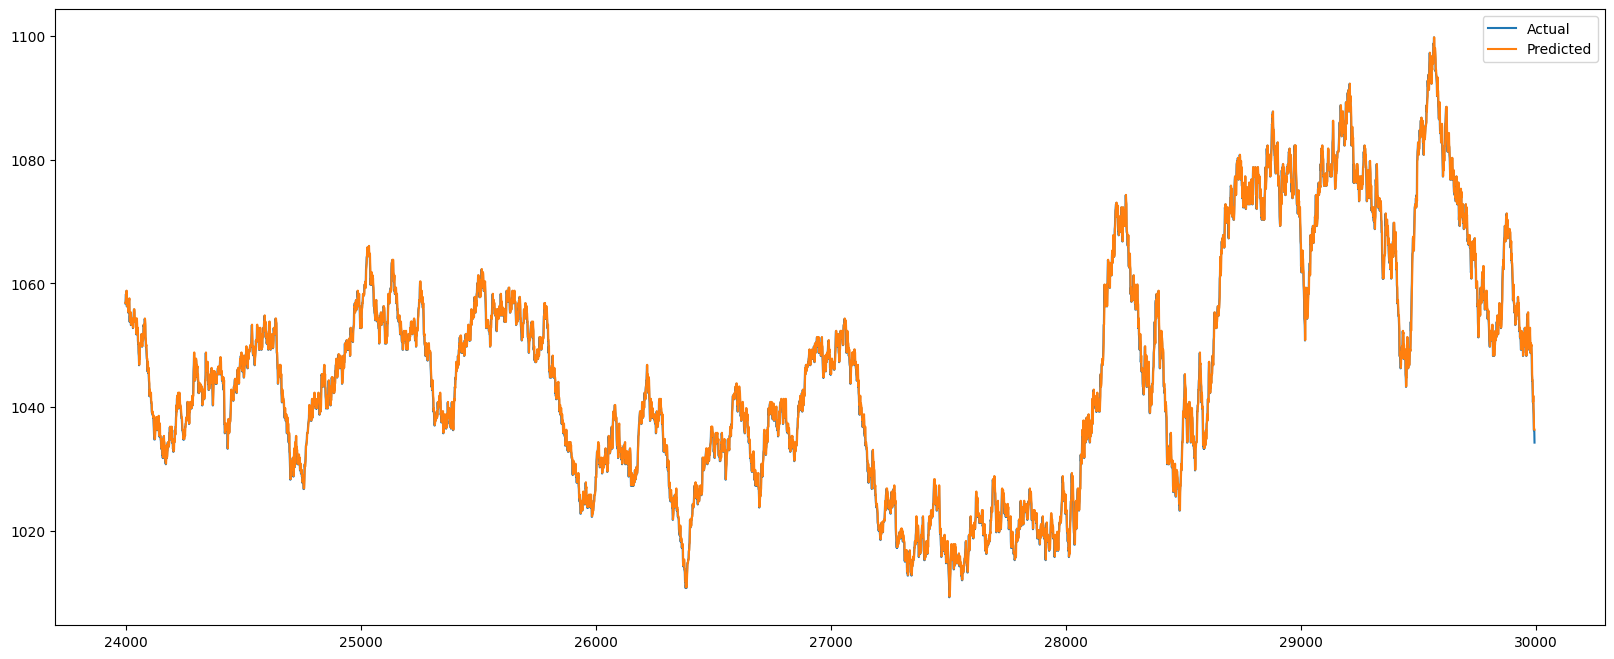

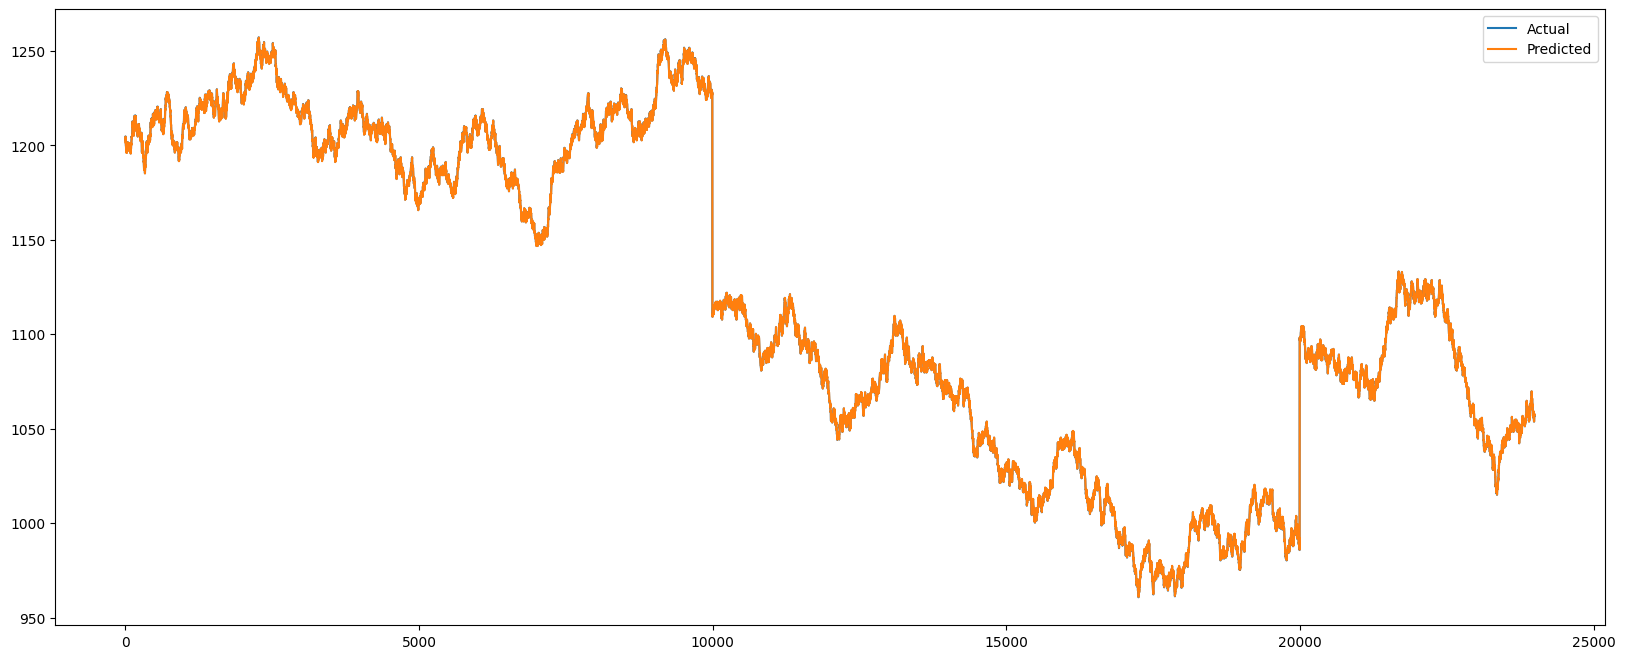

Percentage of times the predicted change same direction as the actual change: 0.42157026171028505
Percentage of times the predicted change same direction as the actual change in Train: 0.4022337056176029
{}
n=7, Coefficients: [0.0, 0.9988442336404714, 0.0, 3.4701001381605283e-06, 0.0, 1.585303603986671e-06, 2.2279276972481416e-06, 1.1108665231066084e-06], Intercept: 1.2767354851785058
[7, [0.9988442336404714, 3.4701001381605283e-06, 1.585303603986671e-06, 2.2279276972481416e-06, 1.1108665231066084e-06], 1.2767354851785058]
MSE: 1.360577576805386, MAPE: 0.08507189183614866, R-Squared: 0.9960662071631672, BIC: 1908.0433176991983

n=8, Coefficients: [0.0, 0.9988422910195384, 0.0, 3.469316021427119e-06, 0.0, 1.5844475405661815e-06, 2.227559547537939e-06, 1.1325506806611806e-06, 2.8888717101997876e-06], Intercept: 1.275609514719008
[8, [0.9988422910195384, 3.469316021427119e-06, 1.5844475405661815e-06, 2.227559547537939e-06, 1.1325506806611806e-06, 2.8888717101997876e-06], 1.275609514719008

In [ ]:
# Plot the best results
Y_PRED = best_results['Y_PRED'].iloc[0]
Y_TEST = best_results['Y_TEST'].iloc[0]
Y_TRAIN = best_results['Y_TRAIN'].iloc[0]
Y_TRAIN_PRED = best_results['Y_TRAIN_PRED'].iloc[0]
n = best_results['n'].iloc[0]

fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(Y_TEST, label='Actual')
plt.plot(Y_PRED, label='Predicted')
plt.legend()
plt.show()




fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(Y_TRAIN, label='Actual')
plt.plot(Y_TRAIN_PRED, label='Predicted')
plt.legend()
plt.show()


# Count the number of times the predicted change same direction as the actual change
count = 0
for i in range(1, len(Y_TEST)):
    if (Y_TEST.iloc[i] - Y_TEST.iloc[i-1]) * (Y_PRED.iloc[i] - Y_TEST.iloc[i-1]) > 0:
        count += 1
        
print(f"Percentage of times the predicted change same direction as the actual change: {count/len(Y_TEST)}")
count = 0
for i in range(1, len(Y_TRAIN)):
    if (Y_TRAIN.iloc[i] - Y_TRAIN.iloc[i-1]) * (Y_TRAIN_PRED[i] - Y_TRAIN.iloc[i-1]) > 0:
        count += 1
        
print(f"Percentage of times the predicted change same direction as the actual change in Train: {count/len(Y_TRAIN)}")
print(directional_accuracy)




top_results = best_results.head(10).iloc[:, :7]

# Iterate through and print out n, coefficients, intercept
for i in range(len(top_results)):
    print(f"n={top_results['n'].iloc[i]}, Coefficients: {list(top_results['coefficients'].iloc[i])}, Intercept: {top_results['intercept'].iloc[i]}")
    print(f"[{top_results['n'].iloc[i]}, {[i for i in list(top_results['coefficients'].iloc[i]) if i != 0.0]}, {top_results['intercept'].iloc[i]}]")
    print(f"MSE: {top_results['mse'].iloc[i]}, MAPE: {top_results['mape'].iloc[i]}, R-Squared: {top_results['rsquared'].iloc[i]}, BIC: {top_results['bic'].iloc[i]}")
    print()

In [ ]:
p2_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,volume_weighted_bid,volume_weighted_ask,total_bid_volume,total_ask_volume,vwap,best_bid,best_ask,mid_price_best,median_price,spread
0,-2,0,STARFRUIT,4997,26,0.0,0.0,0.0,0.0,5003,...,4997.000000,5003.000000,26.0,26.0,5000.000000,4997.0,5003.0,5000.0,5000.0,6.000000
1,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,...,4997.677419,5004.000000,31.0,20.0,5000.156863,4997.0,5004.0,5000.5,4999.0,6.322581
2,-2,200,STARFRUIT,4997,1,4996.0,30.0,0.0,0.0,5003,...,4996.032258,5003.000000,31.0,31.0,4999.516129,4996.0,5003.0,4999.5,4997.0,6.967742
3,-2,300,STARFRUIT,4996,27,0.0,0.0,0.0,0.0,5003,...,4996.000000,5003.000000,27.0,27.0,4999.500000,4996.0,5003.0,4999.5,4999.5,7.000000
4,-2,400,STARFRUIT,4995,20,0.0,0.0,0.0,0.0,5002,...,4995.000000,5002.000000,20.0,20.0,4998.500000,4995.0,5002.0,4998.5,4998.5,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,999500,STARFRUIT,5049,28,0.0,0.0,0.0,0.0,5056,...,5049.000000,5056.000000,28.0,28.0,5052.500000,5049.0,5056.0,5052.5,5052.5,7.000000
29996,0,999600,STARFRUIT,5048,9,5047.0,27.0,0.0,0.0,5054,...,5047.250000,5054.000000,36.0,29.0,5050.261538,5047.0,5054.0,5050.5,5048.0,6.750000
29997,0,999700,STARFRUIT,5053,1,5048.0,26.0,0.0,0.0,5054,...,5048.185185,5054.923077,27.0,26.0,5051.490566,5048.0,5055.0,5051.5,5053.5,6.737892
29998,0,999800,STARFRUIT,5047,27,0.0,0.0,0.0,0.0,5052,...,5047.000000,5053.928571,27.0,28.0,5050.527273,5047.0,5054.0,5050.5,5052.0,6.928571
